# Student Status Classification

### Overview

The quality of higher education institutions is largely determined by the success of its students. Therefore, institutions should aim to minimise the rate at which their students drop out (do not finish the degree course). With the large, feature-rich data institutions collect from their students, there is great potential for analysing current students and making predictions as to whether they are likely to drop out or not. Students who are deemed likely to drop out can then be targeted and provided with extra social/economic support, hopefully decreasing the likelihood of them not finishing their degree course. The dataset was put together by Portuguese researchers and additional background information can be found in their published article [1].

Dataset (Kaggle): https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention/data

**References:**

[1] Realinho V, Machado J, Baptista L, Martins MV. Predicting Student Dropout and Academic Success. Data. 2022; 7(11), 146-163: https://doi.org/10.3390/data7110146 https://www.mdpi.com/2306-5729/7/11/146

### Initialisation

In [350]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [351]:
%matplotlib inline

# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Styling
sns.set_theme()

# Max Columns
pd.set_option('display.max_columns', 100)

### Importing the Data

In [352]:
# Loading and previewing the dataset
df = pd.read_csv('dataset.csv')

### Understanding the Data

In [353]:
rows, cols = df.shape
print(f'Number of entries: {rows}\nNumber of features: {cols-1}')

df.sample(5)

Number of entries: 4424
Number of features: 34


Marital status  Application mode  Application order  Course  \
4184               1                 1                  1      10   
3165               1                 1                  1       6   
545                1                 1                  2       9   
2407               4                12                  1      12   
4324               1                 1                  1      12   

      Daytime/evening attendance  Previous qualification  Nacionality  \
4184                           1                       1            1   
3165                           1                       1            1   
545                            1                       1            1   
2407                           1                      12            1   
4324                           1                       1            1   

      Mother's qualification  Father's qualification  Mother's occupation  \
4184                      23                      28                    1   
3165                       1                       1                    3   
545                       13                       1                    6   
2407                      22                      28                    6   
4324                      13                      14                    8   

      Father's occupation  Displaced  Educational special needs  Debtor  \
4184                    8          1                          0       0   
3165                    8          1                          0       0   
545                    11          0                          0       0   
2407                    6          0                          0       1   
4324                   10          0                          0       0   

      Tuition fees up to date  Gender  Scholarship holder  Age at enrollment  \
4184                        1       0                   0                 19   
3165                        1       0                   1                 18   
545                         1       1                   0                 20   
2407                        0       1                   0                 47   
4324                        1       0                   1                 19   

      International  Curricular units 1st sem (credited)  \
4184              0                                    0   
3165              0                                    0   
545               0                                    0   
2407              0                                    0   
4324              0                                    0   

      Curricular units 1st sem (enrolled)  \
4184                                    6   
3165                                    5   
545                                     5   
2407                                    7   
4324                                    8   

      Curricular units 1st sem (evaluations)  \
4184                                       8   
3165                                      12   
545                                        9   
2407                                       7   
4324                                       8   

      Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
4184                                    5                         11.000000   
3165                                    5                         12.857143   
545                                     4                         10.200000   
2407                                    0                          0.000000   
4324                                    7                         14.400000   

      Curricular units 1st sem (without evaluations)  \
4184                                               0   
3165                                               2   
545                                                0   
2407                                               7   
4324                                               0   

      Curricular units 2

We have a good amount of data; 4424 entries (students), 34 categorical/numerical features and a target variable.

From our sample above, we can see that the categorical data is already ordinally encoded. Ordinal encoding is different to OneHot encoding and both methods have their respective pros and cons. I found the following to offer a good explanation of different encoding methods and a comparison between them all: https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/ 

**Categorical:**

|Series|Description|
|-|-|
| Marital status | The marital status of the student |
| Application mode | The method of application used by the student |
| Application order | The order in which the student applied |
| Course | The course taken by the student |
| Daytime/evening attendance | Whether the student attends classes during the day or in the evening |
| Previous qualification | The qualification obtained by the student before enrolling in higher education |
| Nationality | The nationality of the student |
| Mother's qualification | The qualification of the student's mother |
| Father's qualification | The qualification of the student's father |
| Mother's occupation | The occupation of the student's mother |
| Father's occupation | The occupation of the student's father |
| Displaced | Whether the student is a displaced person |
| Educational special needs | Whether the student has any special educational needs |
| Debtor | Whether the student is a debtor |
| Tuition fees up to date | Whether the student's tuition fees are up to date |
| Gender | The gender of the student |
| Scholarship holder | Whether the student is a scholarship holder |
| International | Whether the student is an international student |

*Table 1 - Pre-encoded categorical columns and respective definitions*

**Numerical:**
|Series|Description|
|-|-|
| Age at enrolment | The age of the student at the time of enrolment |
| Curricular units 1st sem (credited) | The number of curricular units credited by the student in the first semester |
| Curricular units 1st sem (enrolled) | The number of curricular units enrolled by the student in the first semester |
| Curricular units 1st sem (evaluations) | The number of curricular units evaluated by the student in the first semester |
| Curricular units 1st sem (approved) | The number of curricular units approved by the student in the first semester |
| Curricular units 1st sem (grade) | The grade received by the student for curricular units in the first semester |
| Curricular units 1st sem (without_evaluations) | The number of curricular units without evaluation by the student in the first semester | 
| Curricular units 2nd sem (credited) | The number of curricular units credited by the student in the second semester |
| Curricular units 2nd sem (enrolled) | The number of curricular units enrolled by the student in the second semester |
| Curricular units 2nd sem (evaluations) | The number of curricular units evaluated by the student in the second semester |
| Curricular units 2nd sem (approved) | The number of curricular units approved by the student in the second semester |
| Curricular units 2nd sem (grade) | The grade received by the student for curricular units in the second semester |
| Curricular units 2nd sem (without_evaluations) | The number of curricular units without evaluation by the student in the second semester | 
| Unemployment rate | The rate of unemployment in student's country of origin|
| Inflation rate | The rate at which prices increase over time in student's country of origin |
| GDP | Gross Domestic Product - Monetary measure of the market value in student's country of origin |

*Table 2 - Numerical columns and respective definitions*

The dataset comes with categories pre-encoded (ordinal data), but relevant values can be found in Appendix A of [1]. Where I have analysed categorical variables, I make attempt to contextualise the results using the encoded value's respective meaning. 

### Preparing the Data

#### Cleaning Series Titles

In [354]:
# Correcting typo
df = df.rename(columns={'Nacionality': 'Nationality'})

# Storing original column names
col_names = list(df.columns)

# Formatting column names for readability and ease of use
df.columns = df.columns.str.lower().str.replace(' ', '_')

#### Categorical and Numerical Series

In [355]:
# Specifying categorical features
cat = ['marital_status', 'application_mode', 'application_order', 'course',
       'daytime/evening_attendance', 'previous_qualification', 'nationality',
       "mother's_qualification", "father's_qualification",
       "mother's_occupation", "father's_occupation", 'displaced',
       'educational_special_needs', 'debtor', 'tuition_fees_up_to_date',
       'gender', 'scholarship_holder', 'age_at_enrollment', 'international']

num = []

# Extracting numerical features
for i in df.columns:
    if i not in cat and i != 'target':
        num.append(i)

print(f'Number of numerical features: {len(num)}')
print(f'Number of categorical features: {len(cat)}')

Number of numerical features: 15
Number of categorical features: 19


The dataset has a similar number of categorical and numerical features.

#### Null Values

In [356]:
df.isnull().sum()

marital_status                                    0
application_mode                                  0
application_order                                 0
course                                            0
daytime/evening_attendance                        0
previous_qualification                            0
nationality                                       0
mother's_qualification                            0
father's_qualification                            0
mother's_occupation                               0
father's_occupation                               0
displaced                                         0
educational_special_needs                         0
debtor                                            0
tuition_fees_up_to_date                           0
gender                                            0
scholarship_holder                                0
age_at_enrollment                                 0
international                                     0
curricular_u

In [357]:
# Checking for missing values
print(f'Number of series with missing values: {df.shape[1] - df.isnull().sum().value_counts()[0]}')

Number of series with missing values: 0


None of the series contain missing data which is quite handy for us!

#### Duplicate Values

In [358]:
print(f'Number of duplicate entries: {df.duplicated().sum()}')

Number of duplicate entries: 0


Additionally, the dataset does not appear to contain any duplicate entries.

### Exploratory Data Analysis

#### Categorical Series

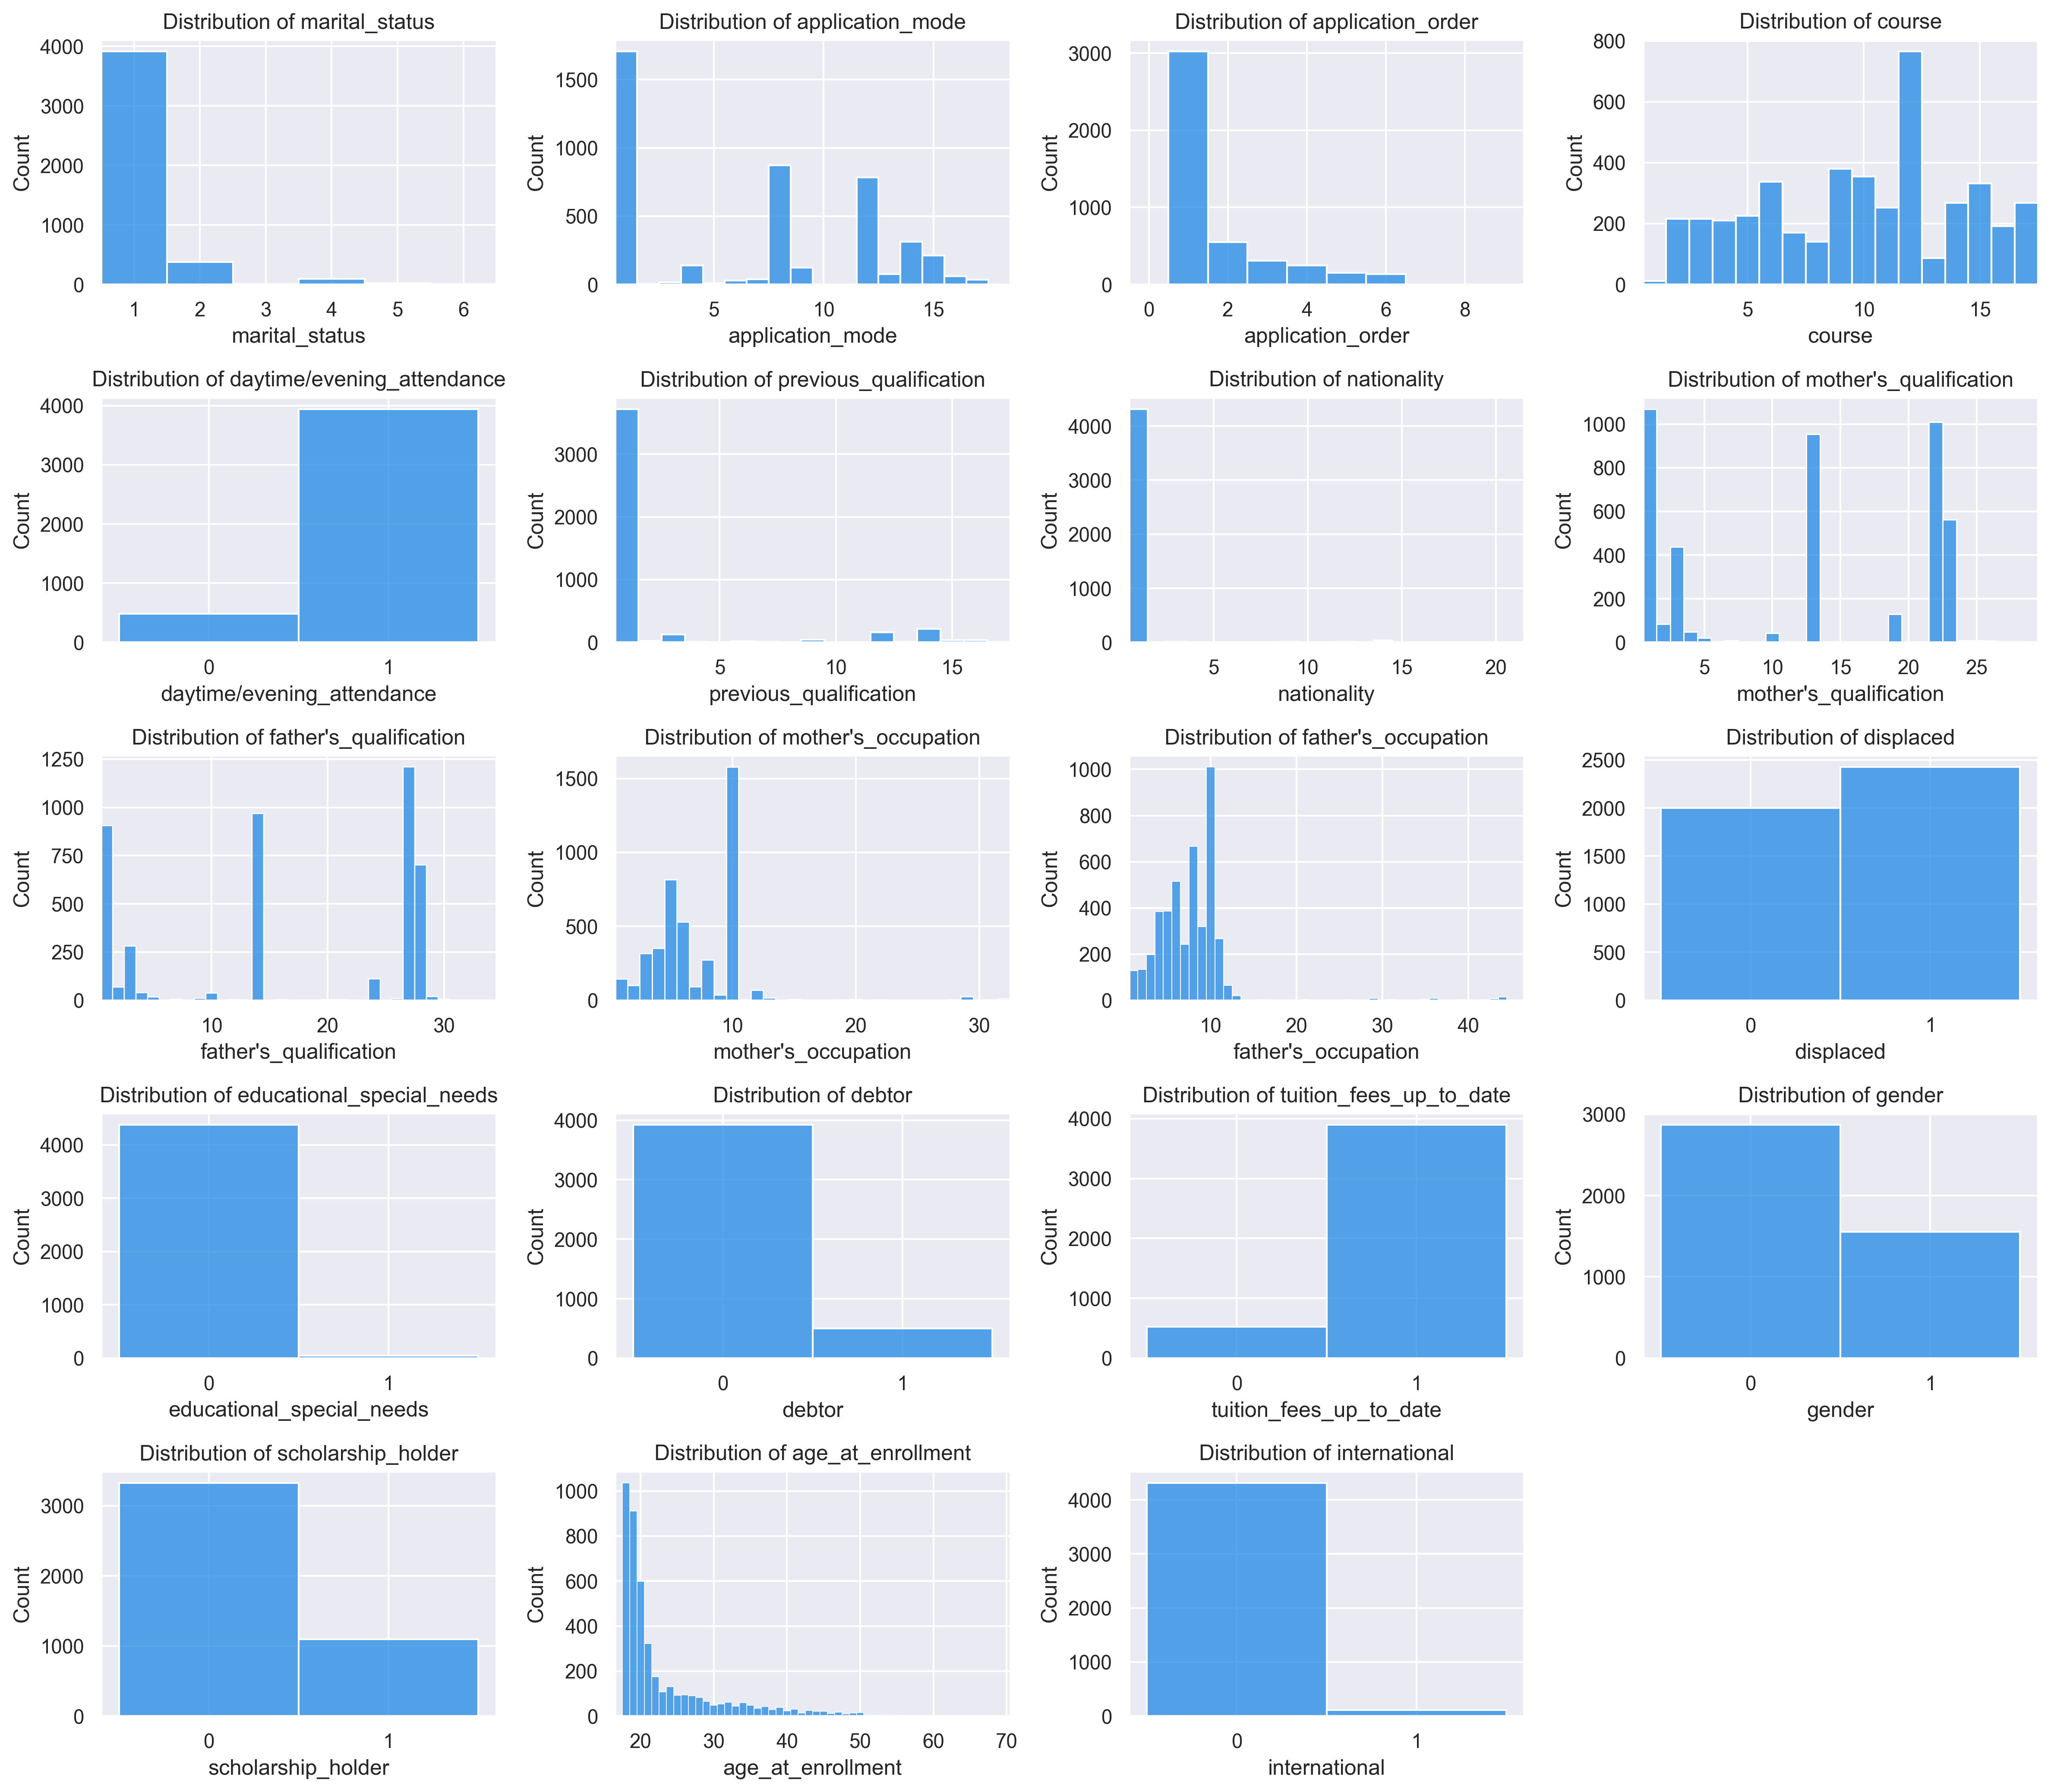

In [359]:
plt.figure(figsize=(16, 14), dpi=300)

for i, col in enumerate(df[cat].columns, 1):
    plt.subplot(5,4,i)
    plt.title(f"Distribution of {col}")
    
    if df[col].nunique() <= 2:
        sns.histplot(df[col], discrete=True, color='#1E88E5')
        plt.xticks([0, 1])
    else:
        sns.histplot(df[col], discrete=True, bins=(df[col].nunique() - 1), color='#1E88E5')
        plt.xlim((df[col].min() - 0.5, df[col].max() + 0.5))

    plt.tight_layout()
    plt.plot()

Discrete distributions of categorical features. The majority of features have 2 categories; otherwise, considerably more than 2 categories. Lots of the features are imbalanced and possess at least 1 dominating category; this may prove challenging for our model later on as the dominating categories could disguise the importance of the other categories and lead to suboptimal performance.

##### Target

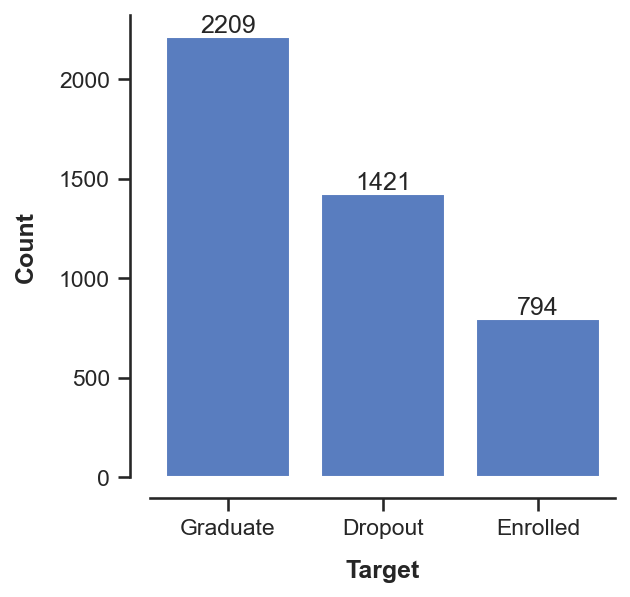

In [360]:
plt.figure(figsize=(4,4), dpi=150)
sns.set(style='ticks', palette='muted')

ax = sns.barplot(df['target'].value_counts())
sns.despine(offset=10)

ax.bar_label(ax.containers[0])

plt.xlabel('Target', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Count', fontsize=12, fontweight='bold', labelpad=10)

plt.show()

The dataset is imbalanced with 'Graduate' being the most common outcome. We can account for this by using **macro-averaging** when evaluated our multi-class models.


Macro averaging gives equal weight to each target class, regardless of how many instances of each class there are. This is useful when we have an imbalanced dataset (like our own) or when all of the classes are equally important. In cases where one has a large amount of classes, macro-averaging has the potential to overestimate or underestimate model performance. Thankfully, we only have $n = 3$ classes, so this should not be the case. 

##### Marital Status

As mentioned, the categorical variables are pre-encoded with the dataset. However, the original paper discloses what each encoded category corresponds to. For 'marital_status' encoding is as follows:

| Encoded Value | True Value |
|-|-|
| 1 | Single |
| 2 | Married | 
| 3 | Widower |
| 4 | Divorced |
| 5 | Facto union |
| 6 | Legally separated |

In [361]:
marital_labels = ['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Separated']

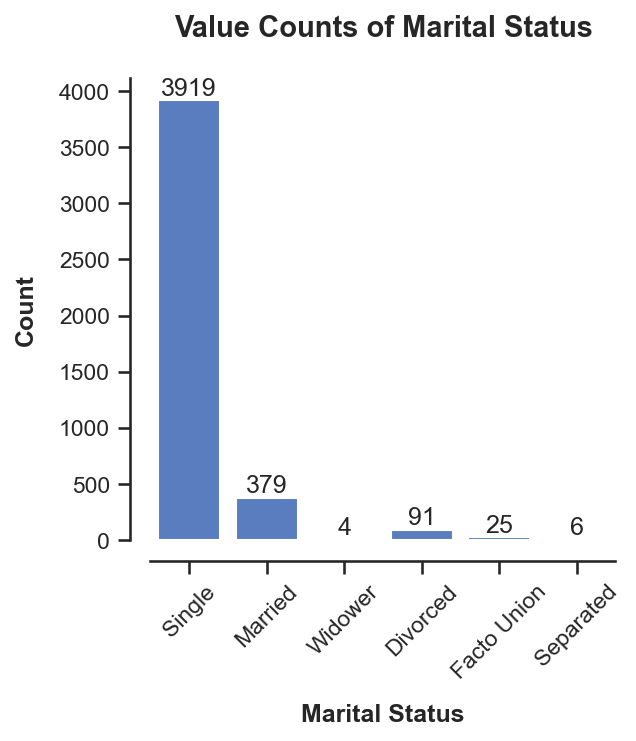

In [362]:
plt.figure(figsize=(4,4), dpi=150)
sns.set(style='ticks', palette='muted')

ax = sns.barplot(df['marital_status'].value_counts())
sns.despine(offset=10)

ax.bar_label(ax.containers[0])

plt.xlabel('Marital Status', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Count', fontsize=12, fontweight='bold', labelpad=10)

plt.xticks(range(6), labels=marital_labels, rotation=45)
plt.title('Value Counts of Marital Status', fontsize=14, fontweight='bold', pad=20)

plt.show()

<Figure size 1500x1500 with 0 Axes>

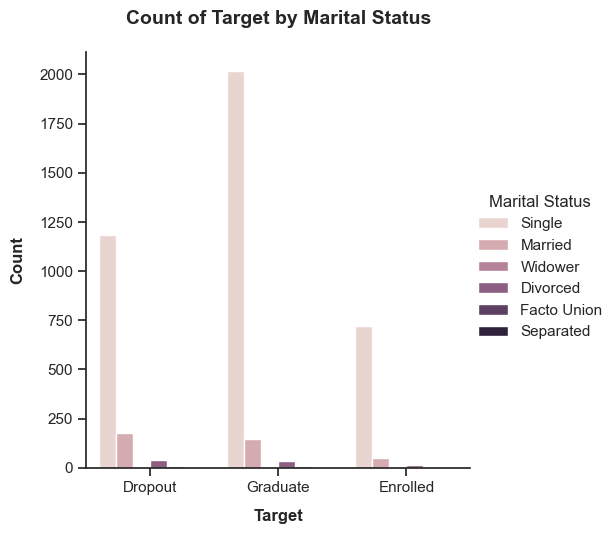

In [363]:
plt.figure(figsize=(6,6), dpi=250)
sns.set(style='ticks', palette='muted')

ax = sns.catplot(x='target', kind='count', hue='marital_status', data=df, legend=False)
ax.add_legend(title='Marital Status', labels=marital_labels)

plt.xlabel('Target', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Count', fontsize=12, fontweight='bold', labelpad=10)

plt.title('Count of Target by Marital Status', fontsize=14, fontweight='bold', pad=20)

plt.show()

<Figure size 1500x1500 with 0 Axes>

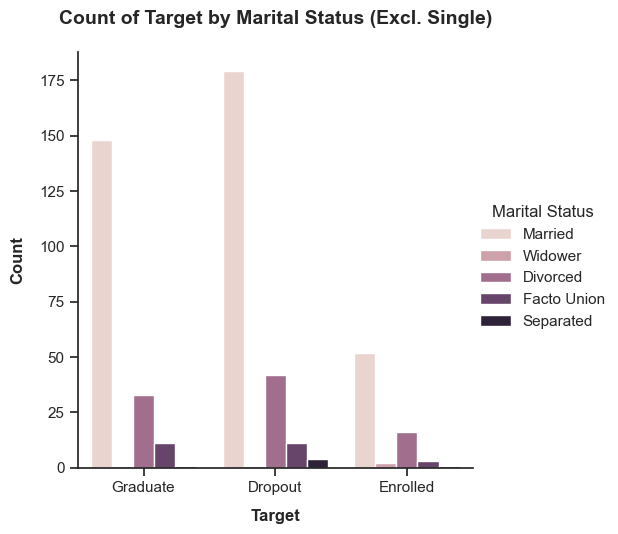

In [364]:
plt.figure(figsize=(6,6), dpi=250)
sns.set(style='ticks', palette='muted')

ax = sns.catplot(x='target', kind='count', hue='marital_status', data=df[df['marital_status'] != 1], legend=False)
ax.add_legend(title='Marital Status', labels=marital_labels[1:])

plt.xlabel('Target', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Count', fontsize=12, fontweight='bold', labelpad=10)

plt.title('Count of Target by Marital Status (Excl. Single)', fontsize=14, fontweight='bold', pad=20)

plt.show()

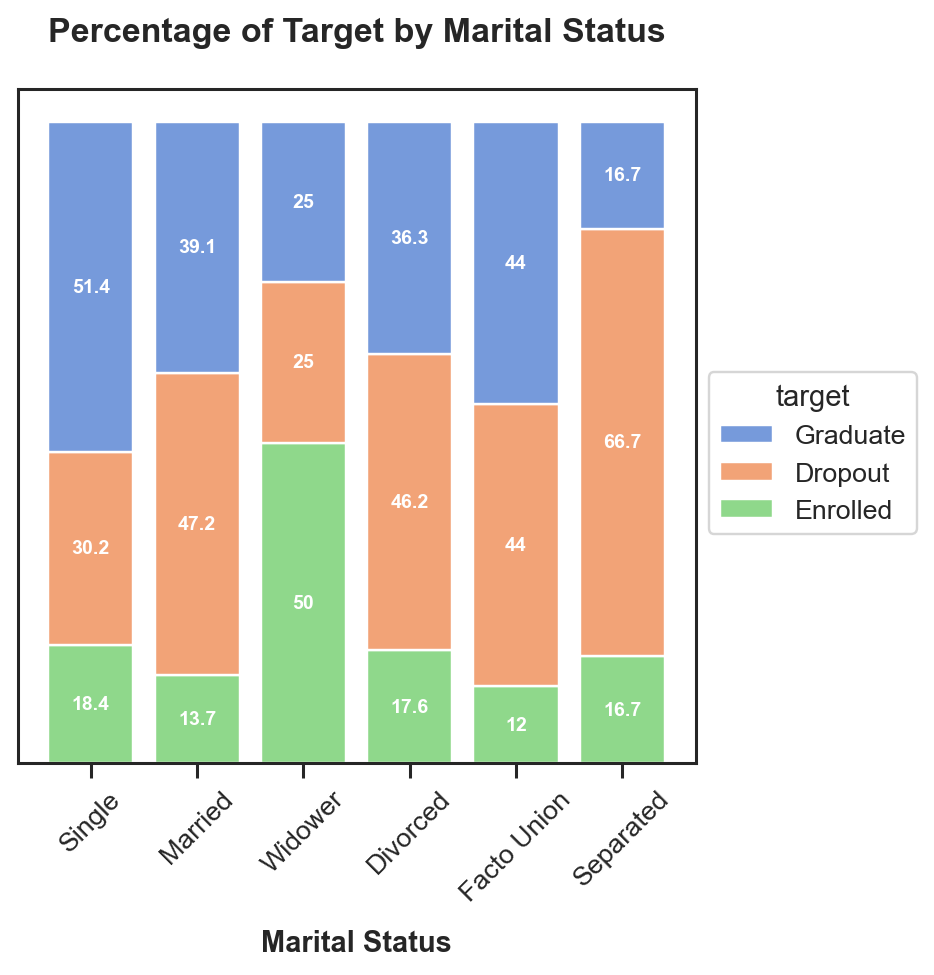

In [365]:
plot = df.groupby('marital_status')['target'].value_counts(normalize=True).mul(100).round(1).reset_index(name='percentage')

plt.figure(figsize=(5,5), dpi=175)
sns.set(style='ticks', palette='muted')

ax = sns.histplot(x='marital_status', hue='target', data=plot, multiple='stack', weights='percentage', 
                  shrink=0.8, bins=5, discrete=True, legend=True)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 0.6))

ax.set_yticks([])
plt.ylabel('')

plt.title('Percentage of Target by Marital Status', fontsize=14, fontweight='bold', pad=20)

plt.xticks([1, 2, 3, 4, 5, 6], marital_labels, rotation=45)
plt.xlabel('Marital Status', fontsize=12, fontweight='bold', labelpad=10)

for c in ax.containers:

    ax.bar_label(c, label_type='center', color='w', fontsize=8, fontweight='bold')

plt.show()

Based on the data, the majority of students are single during their time at university and single students have the highest graduation rate compared to the other statuses. One might bounce at 'Seperated' having the highest dropout rate, but due to the low count this proportion is not particularly representative of anything.

##### Application Mode

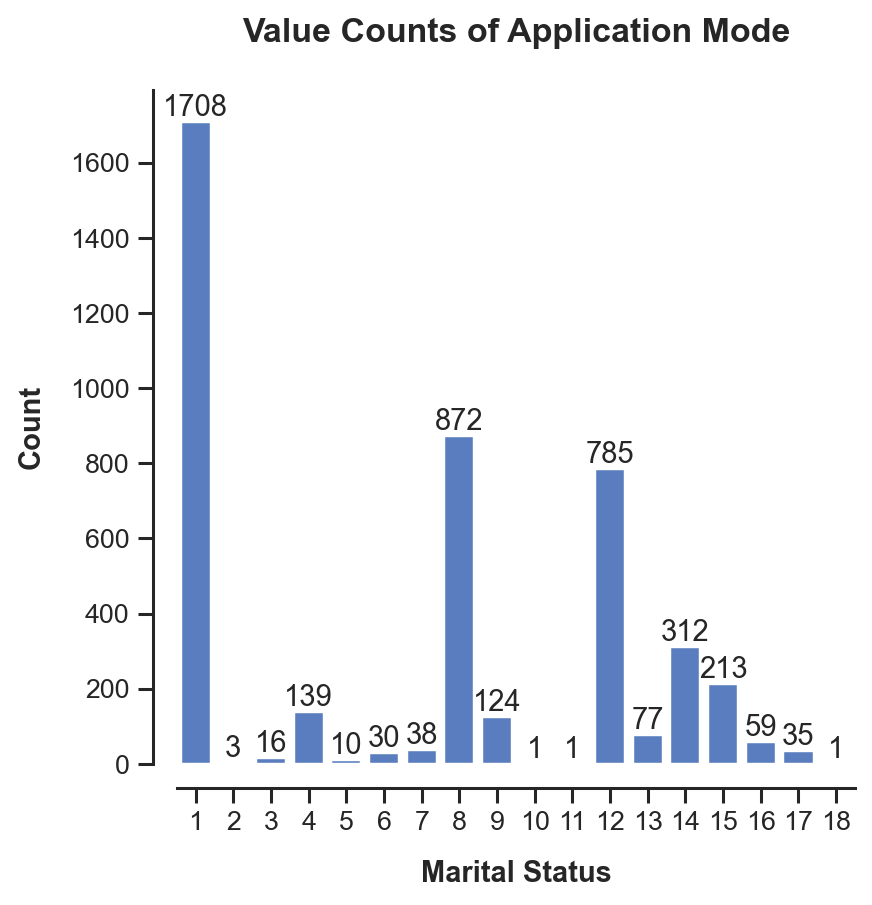

In [366]:
plt.figure(figsize=(5,5), dpi=175)
sns.set(style='ticks', palette='muted')

ax = sns.barplot(df['application_mode'].value_counts())
sns.despine(offset=10)

ax.bar_label(ax.containers[0])

plt.xlabel('Marital Status', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Count', fontsize=12, fontweight='bold', labelpad=10)

plt.title('Value Counts of Application Mode', fontsize=14, fontweight='bold', pad=20)

plt.show()

1, 4, 8, 9, 12, 14, 15

In [367]:
idx = [1, 4, 8, 9, 12, 14, 15]

df['application_mode'].value_counts()[idx]

application_mode
1     1708
4      139
8      872
9      124
12     785
14     312
15     213
Name: count, dtype: int64

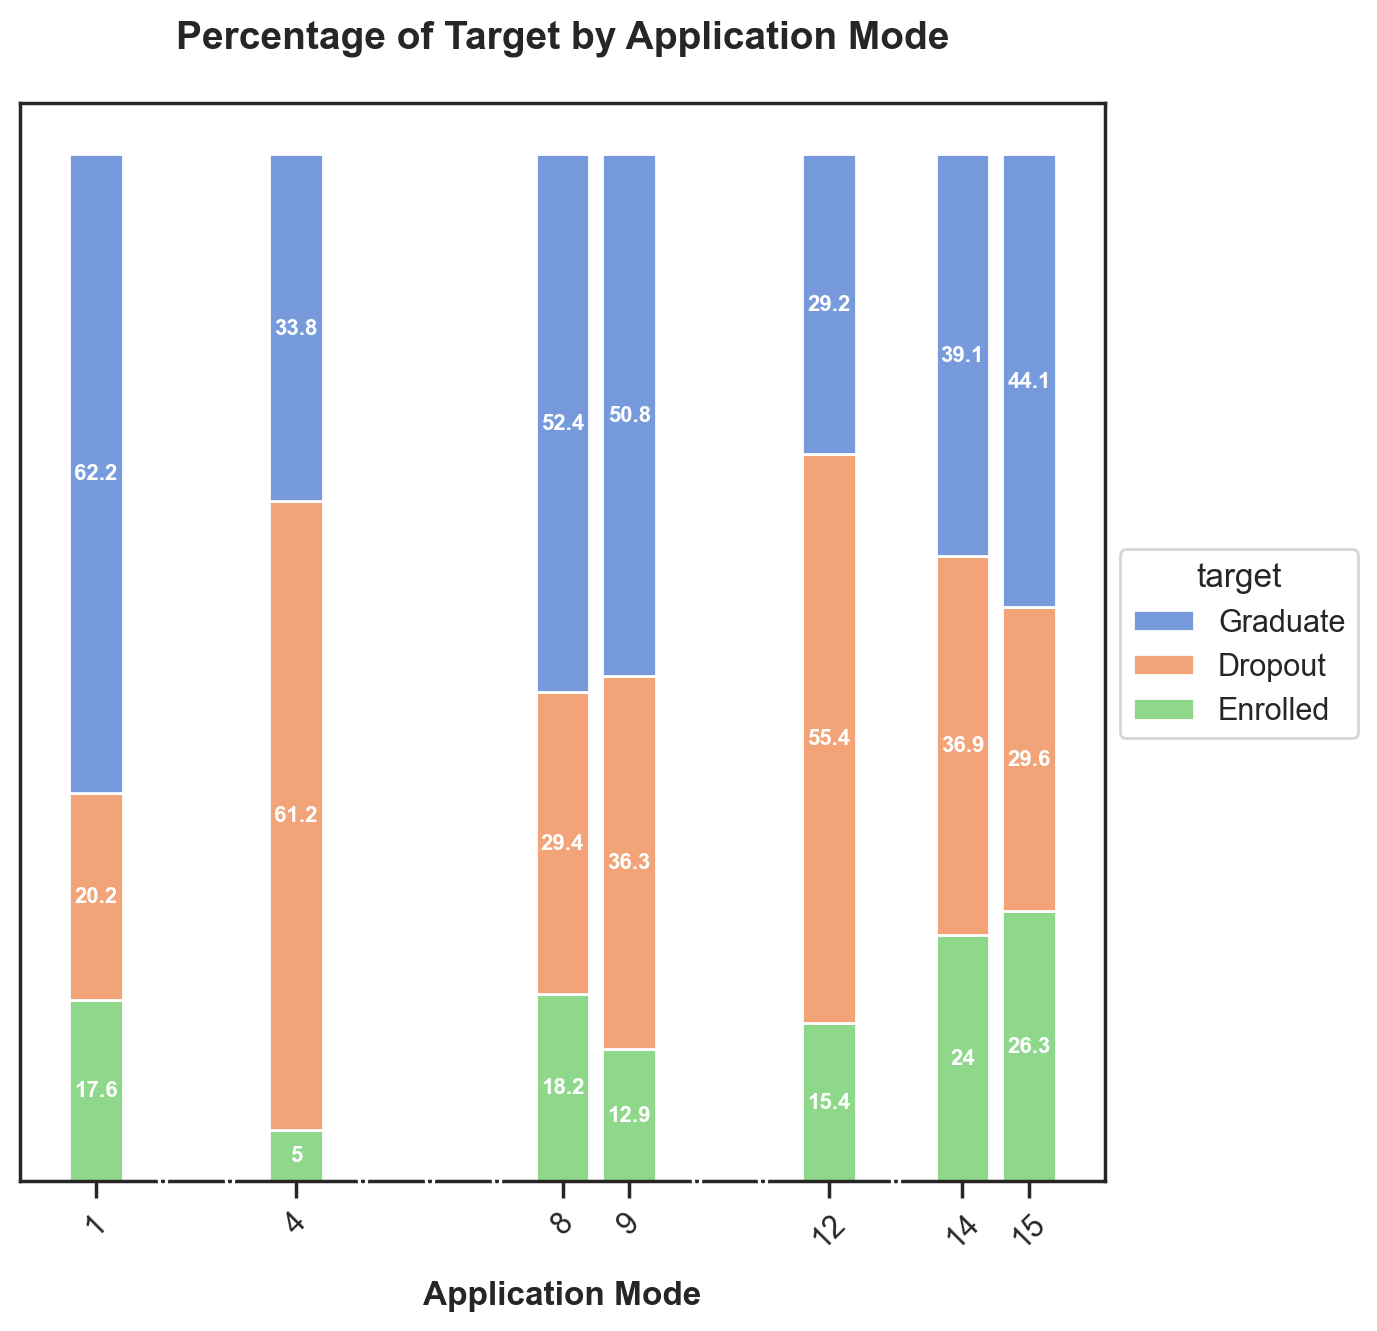

In [368]:
plot = df.groupby('application_mode')['target'].value_counts(normalize=True)[idx].mul(100).round(1).reset_index(name='percentage')


plt.figure(figsize=(7, 7), dpi=200)
sns.set(style='ticks', palette='muted')

ax = sns.histplot(x='application_mode', hue='target', data=plot, multiple='stack', weights='percentage', 
                  shrink=0.8, discrete=True, legend=True)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 0.6))

ax.set_yticks([])
plt.ylabel('')

plt.title('Percentage of Target by Application Mode', fontsize=14, fontweight='bold', pad=20)

plt.xticks(idx, rotation=45)
plt.xlabel('Application Mode', fontsize=12, fontweight='bold', labelpad=10)

for c in ax.containers:

    ax.bar_label(c, label_type='center', color='w', fontsize=8, fontweight='bold')

plt.show()

Based on the varying distributions of our target variable across the different application modes, one may assume that the feature is relevent in building an accurate model. For example, the graduation rate across the 7 selected types above varies greatly, from as low as ~29% all the way up to ~62%.

**My intention is to explore each features individually as I have with `target`, `marital_status` and `application_mode`, above; however, due to time constraints I will be leaving the univariate analysis here.**

#### Numerical Series

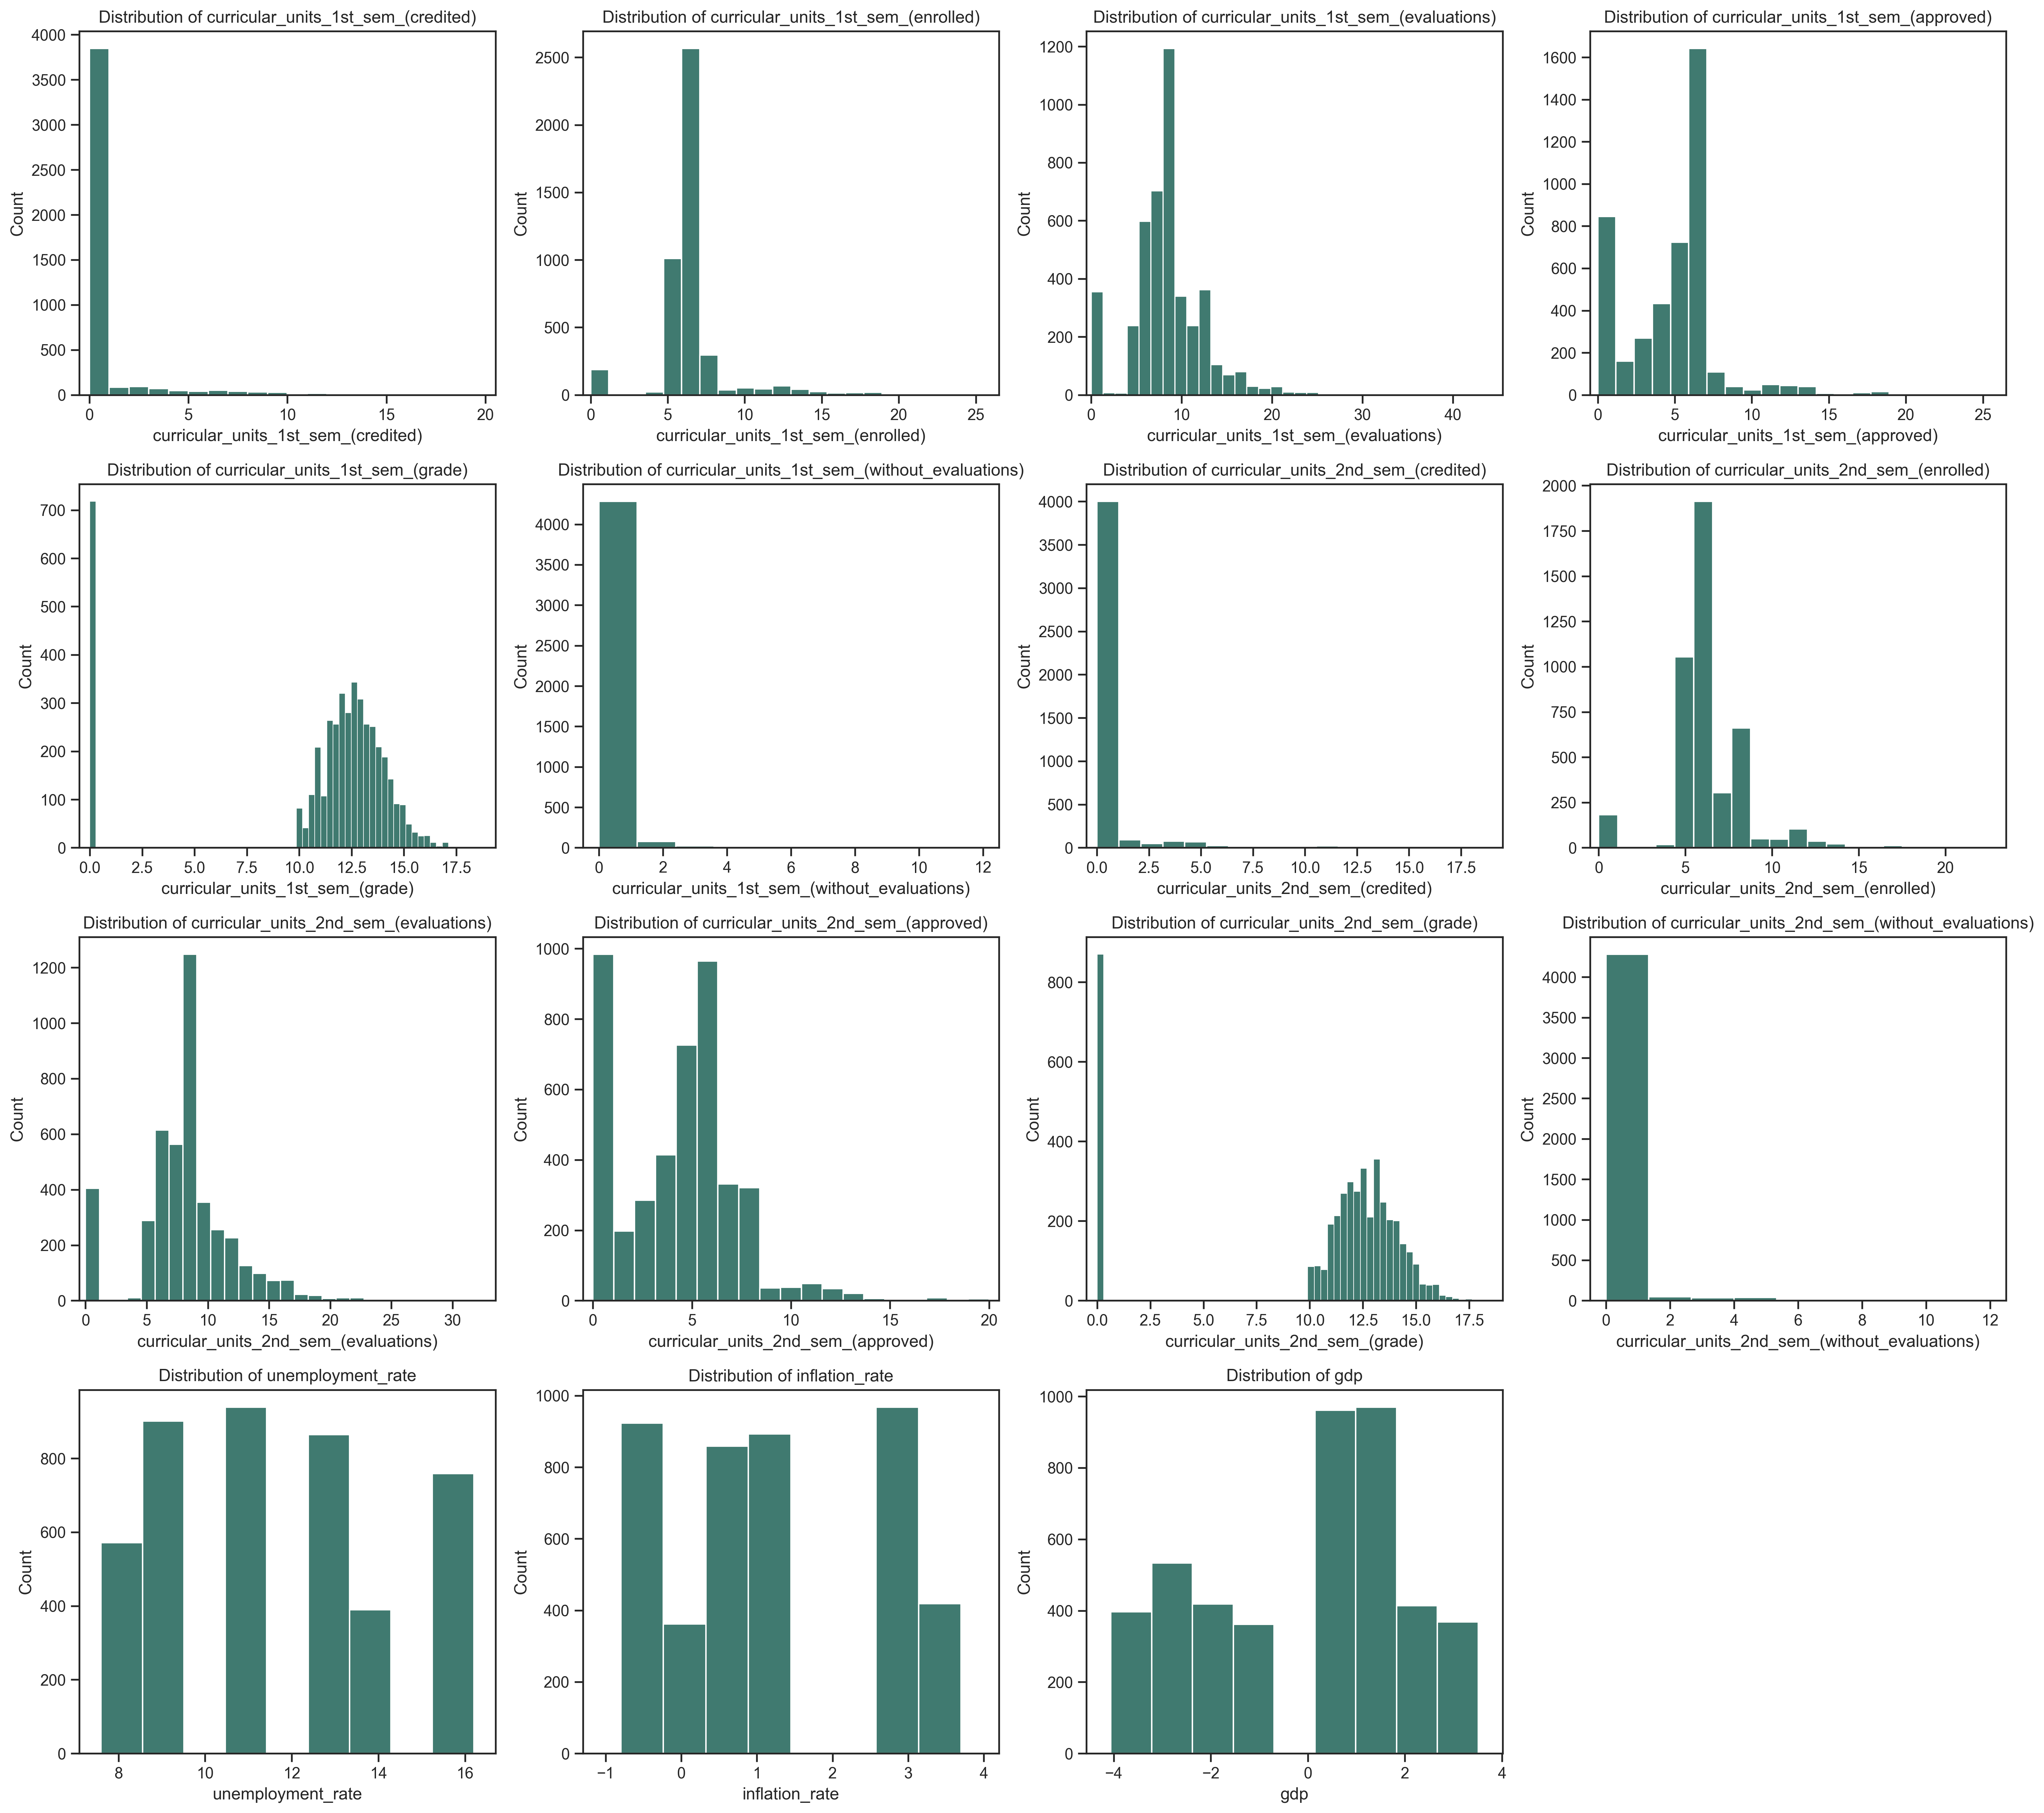

In [369]:
plt.figure(figsize=(20, 18), dpi=300)

for i, col in enumerate(df[num].columns, 1):
    plt.subplot(4,4,i)
    plt.title(f"Distribution of {col}")

    if col == ('curricular_units_1st_sem_(grade)') or col == ('curricular_units_2nd_sem_(grade)'):
        sns.histplot(df[col], color='#004D40')
        plt.xlim((df[col].min() - 0.5, df[col].max() + 0.5))
    else:
        sns.histplot(df[col], bins=(df[col].nunique() - 1), color='#004D40')
        plt.xlim((df[col].min() - 0.5, df[col].max() + 0.5))

    plt.tight_layout()
    plt.plot()

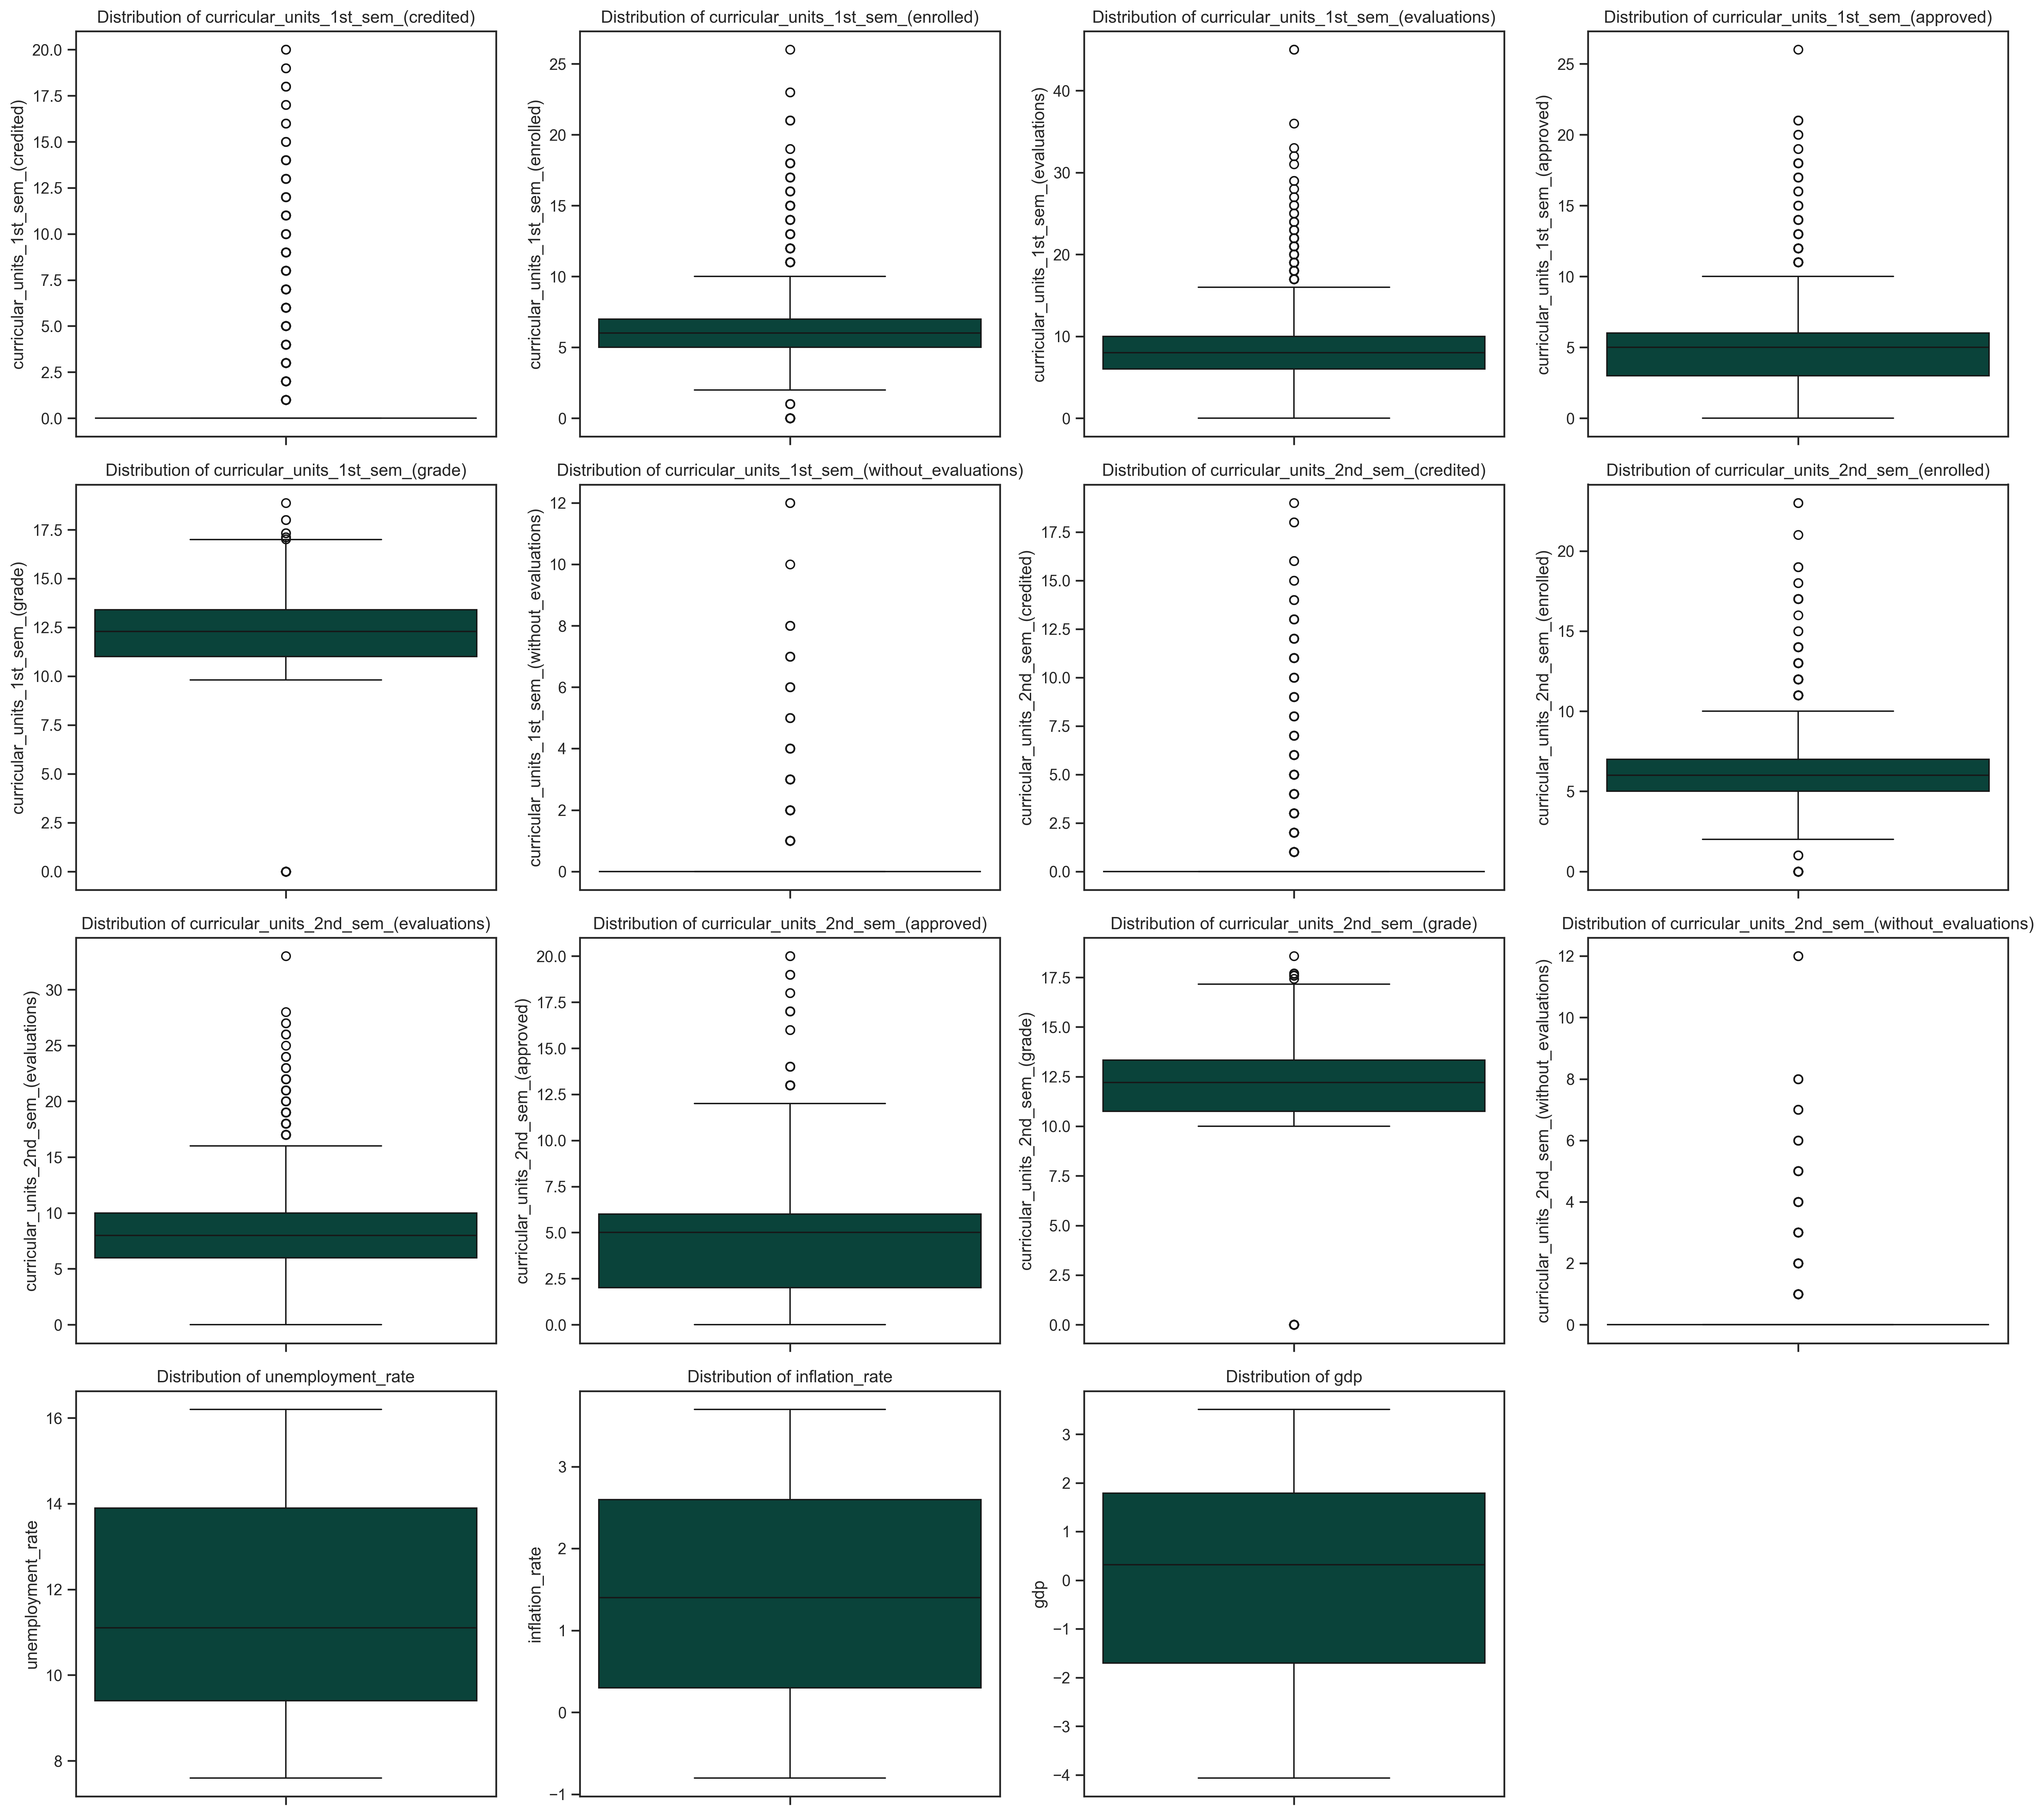

In [370]:
plt.figure(figsize=(20, 18), dpi=300)

for i, col in enumerate(df[num].columns, 1):
    plt.subplot(4,4,i)
    plt.title(f"Distribution of {col}")

    if col == ('curricular_units_1st_sem_(grade)') or col == ('curricular_units_2nd_sem_(grade)'):
        sns.boxplot(df[col], color='#004D40')
    else:
        sns.boxplot(df[col], color='#004D40')

    plt.tight_layout()
    plt.plot()

Likewise with the categorical features, a some of the numerical features are dominated by a particular value (or bin of values). This could have negative effects on our model, so we should train some models included/not-included these features and determine whether they harm the model or not.

#### Preparing Target Series

In [371]:
df['target'], uniques = pd.factorize(df['target'])

uniques

Index(['Dropout', 'Graduate', 'Enrolled'], dtype='object')

| Target | Value |
|-|-|
| Dropout | 0 |
| Graduate | 1 |
| Enrolled | 2 |

We have successfully encoded the target data which makes things easier for the multi-class models.

#### Comparing Features

##### Pairplot (Scatterplots) of Select Numerical Features

In [372]:
num_new = ['curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)',
       'curricular_units_2nd_sem_(evaluations)',
       'curricular_units_2nd_sem_(approved)',
       'curricular_units_2nd_sem_(grade)',]

<Figure size 10000x10000 with 0 Axes>

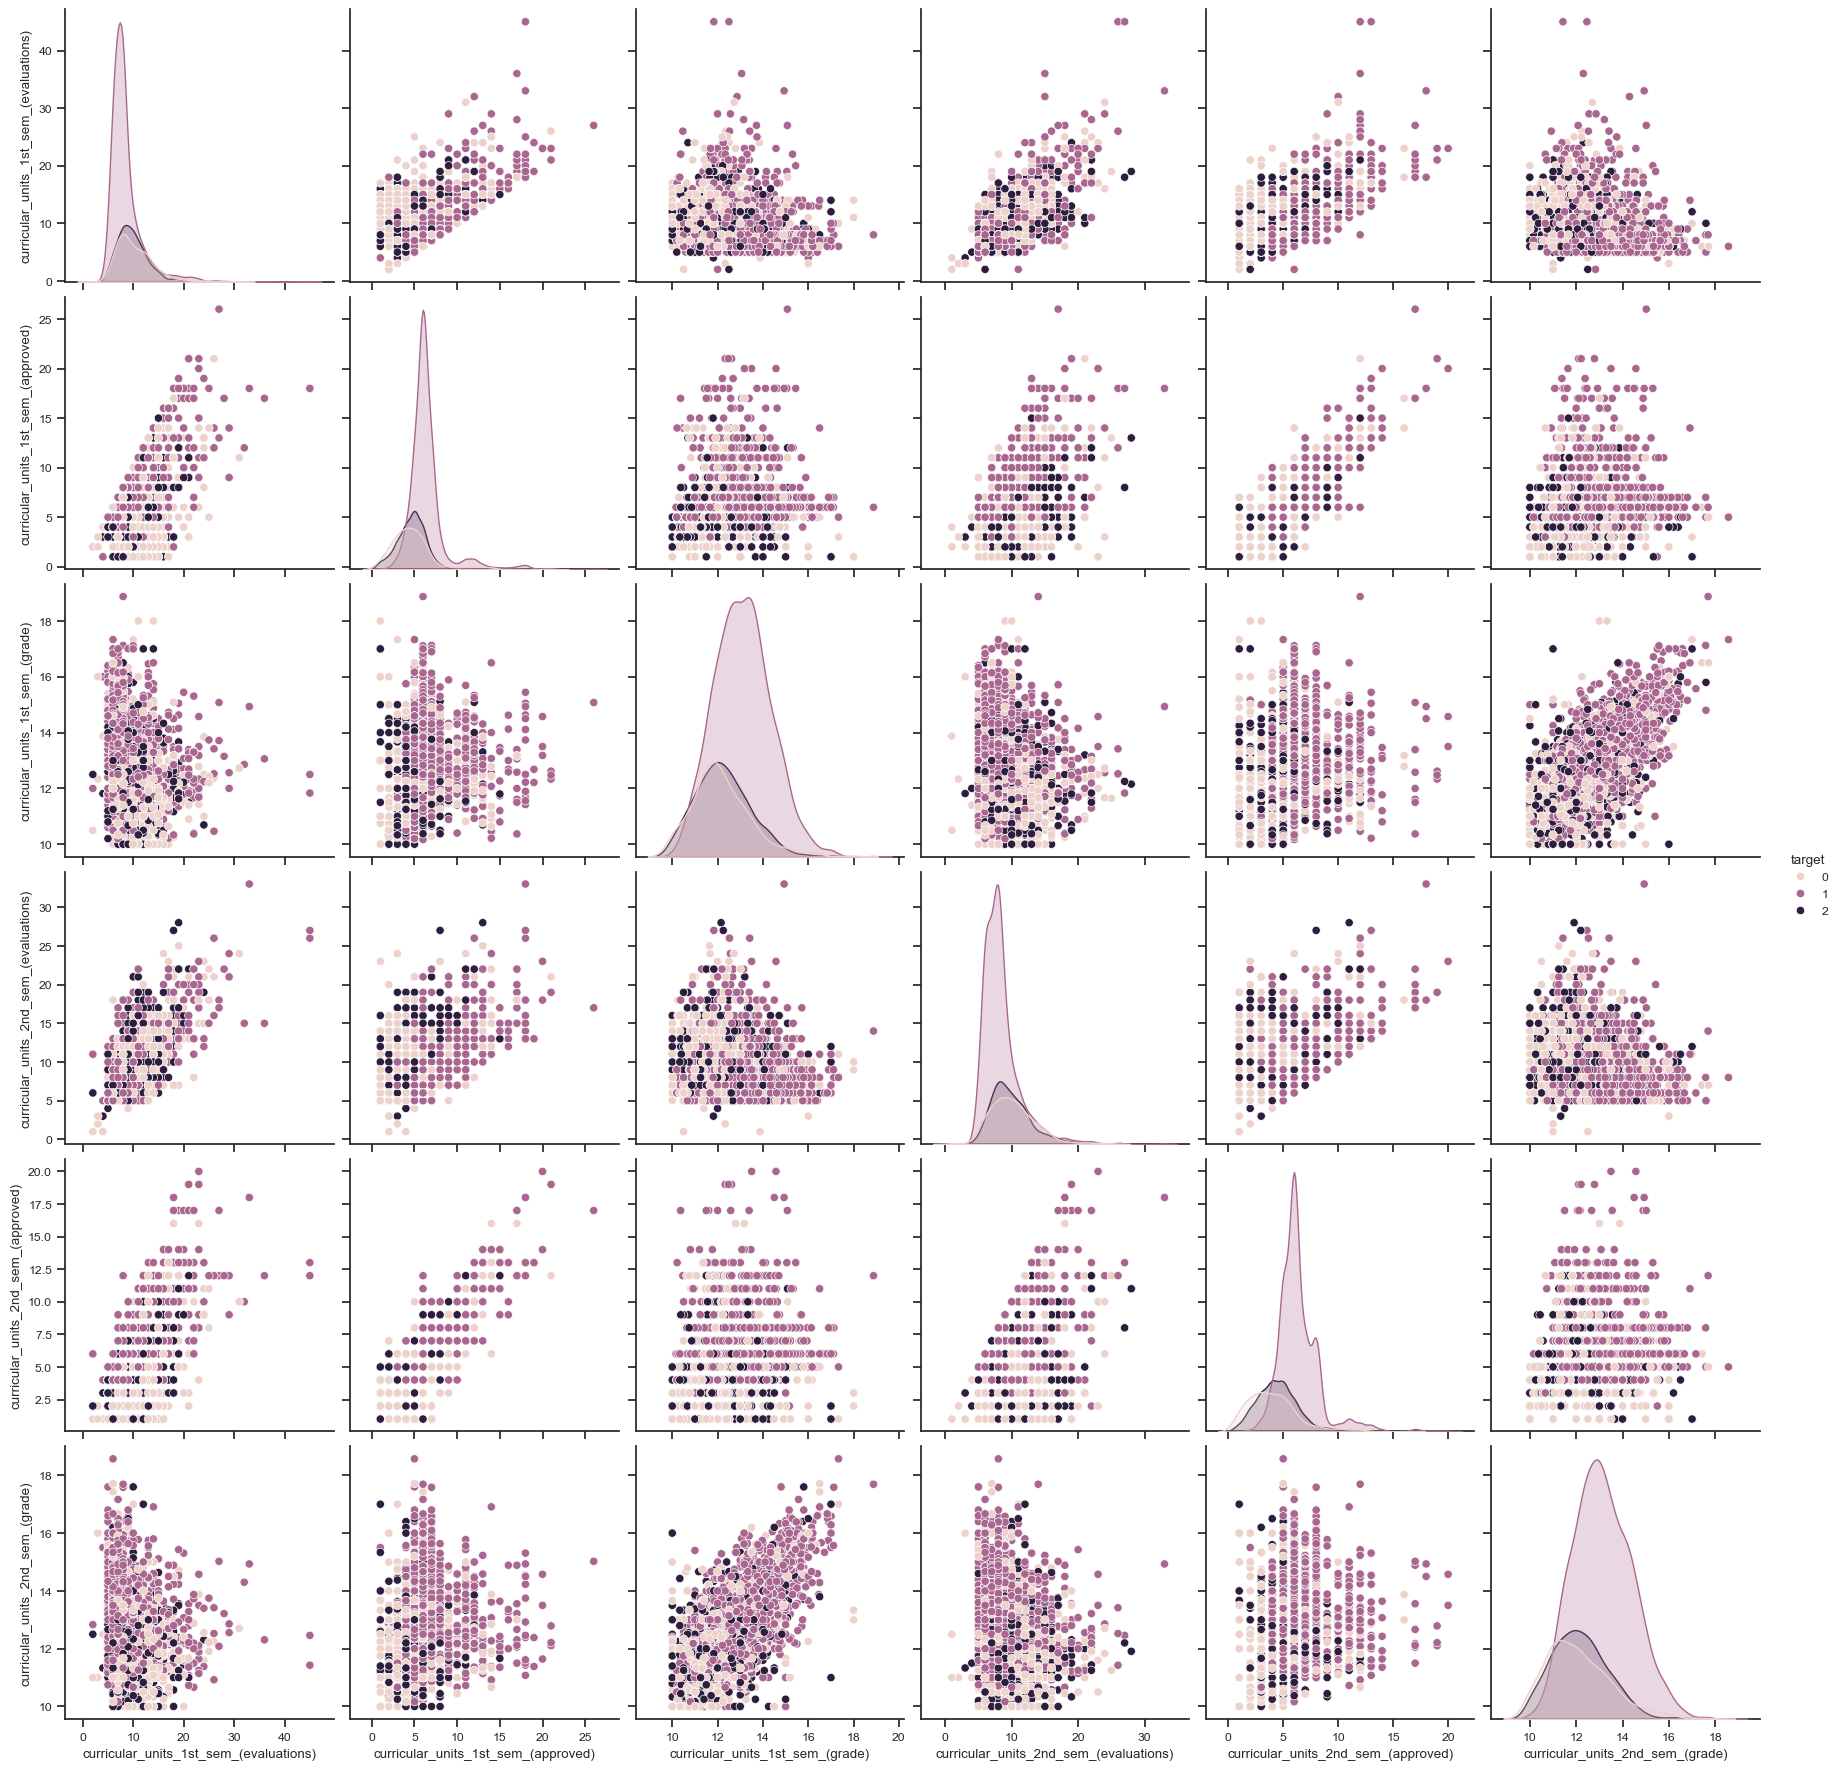

In [373]:
plt.figure(figsize=(20,20), dpi=500)

sns.set(font_scale=0.8, style='ticks', palette='muted')

sns.pairplot(df[(df['curricular_units_1st_sem_(grade)'] > 0) & (df['curricular_units_2nd_sem_(grade)'] > 0)],
              vars = num_new, hue='target', height=3)

Generally, there is a positive correlation between grades of students in the 1st and 2nd semesters, suggesting consistent performance of students. Gradute students typically score higher than students who dropped out (as one might expect). Students who score well in both semesters but still dropout may being doing so for socio-economic reasons; hence, it's important to consider both categorical and numerical features in unison.

##### Mutual Information

In [374]:
from sklearn.metrics import mutual_info_score

def category_score(series):
    return mutual_info_score(series, df.target)

target_mis = (df.apply(category_score).sort_values(ascending=False))

print(f'Most important features by Mutual Information Score:\n\n{target_mis[1:11]}')

Most important features by Mutual Information Score:

curricular_units_2nd_sem_(grade)          0.356965
curricular_units_2nd_sem_(approved)       0.316069
curricular_units_1st_sem_(grade)          0.314610
curricular_units_1st_sem_(approved)       0.246978
curricular_units_2nd_sem_(evaluations)    0.096403
tuition_fees_up_to_date                   0.091828
curricular_units_1st_sem_(evaluations)    0.090263
course                                    0.066468
age_at_enrollment                         0.062007
application_mode                          0.052221
dtype: float64


In [375]:
least_mis = target_mis.index[-15:]

least_mis, len(least_mis)

(Index(['previous_qualification', 'application_order',
        'curricular_units_1st_sem_(credited)',
        'curricular_units_2nd_sem_(without_evaluations)',
        'curricular_units_1st_sem_(without_evaluations)',
        'curricular_units_2nd_sem_(credited)', 'marital_status', 'displaced',
        'unemployment_rate', 'gdp', 'nationality', 'inflation_rate',
        'daytime/evening_attendance', 'international',
        'educational_special_needs'],
       dtype='object'),
 15)

The series with the lowest mutual information score are 'curricular_units_2nd_sem_(credited)', 'marital_status', 'displaced',
       'unemployment_rate', 'gdp', 'nationality', 'inflation_rate',
       'daytime/evening_attendance', 'international' and 'educational_special_needs'.

##### Correlation

In [376]:
# Preparing axis labels
import string

col_names_hm = []

for i in col_names:
    col_names_hm.append(string.capwords(i))

col_names_cat = col_names_hm[:len(cat)]
col_names_num = col_names_hm[len(cat):-1]

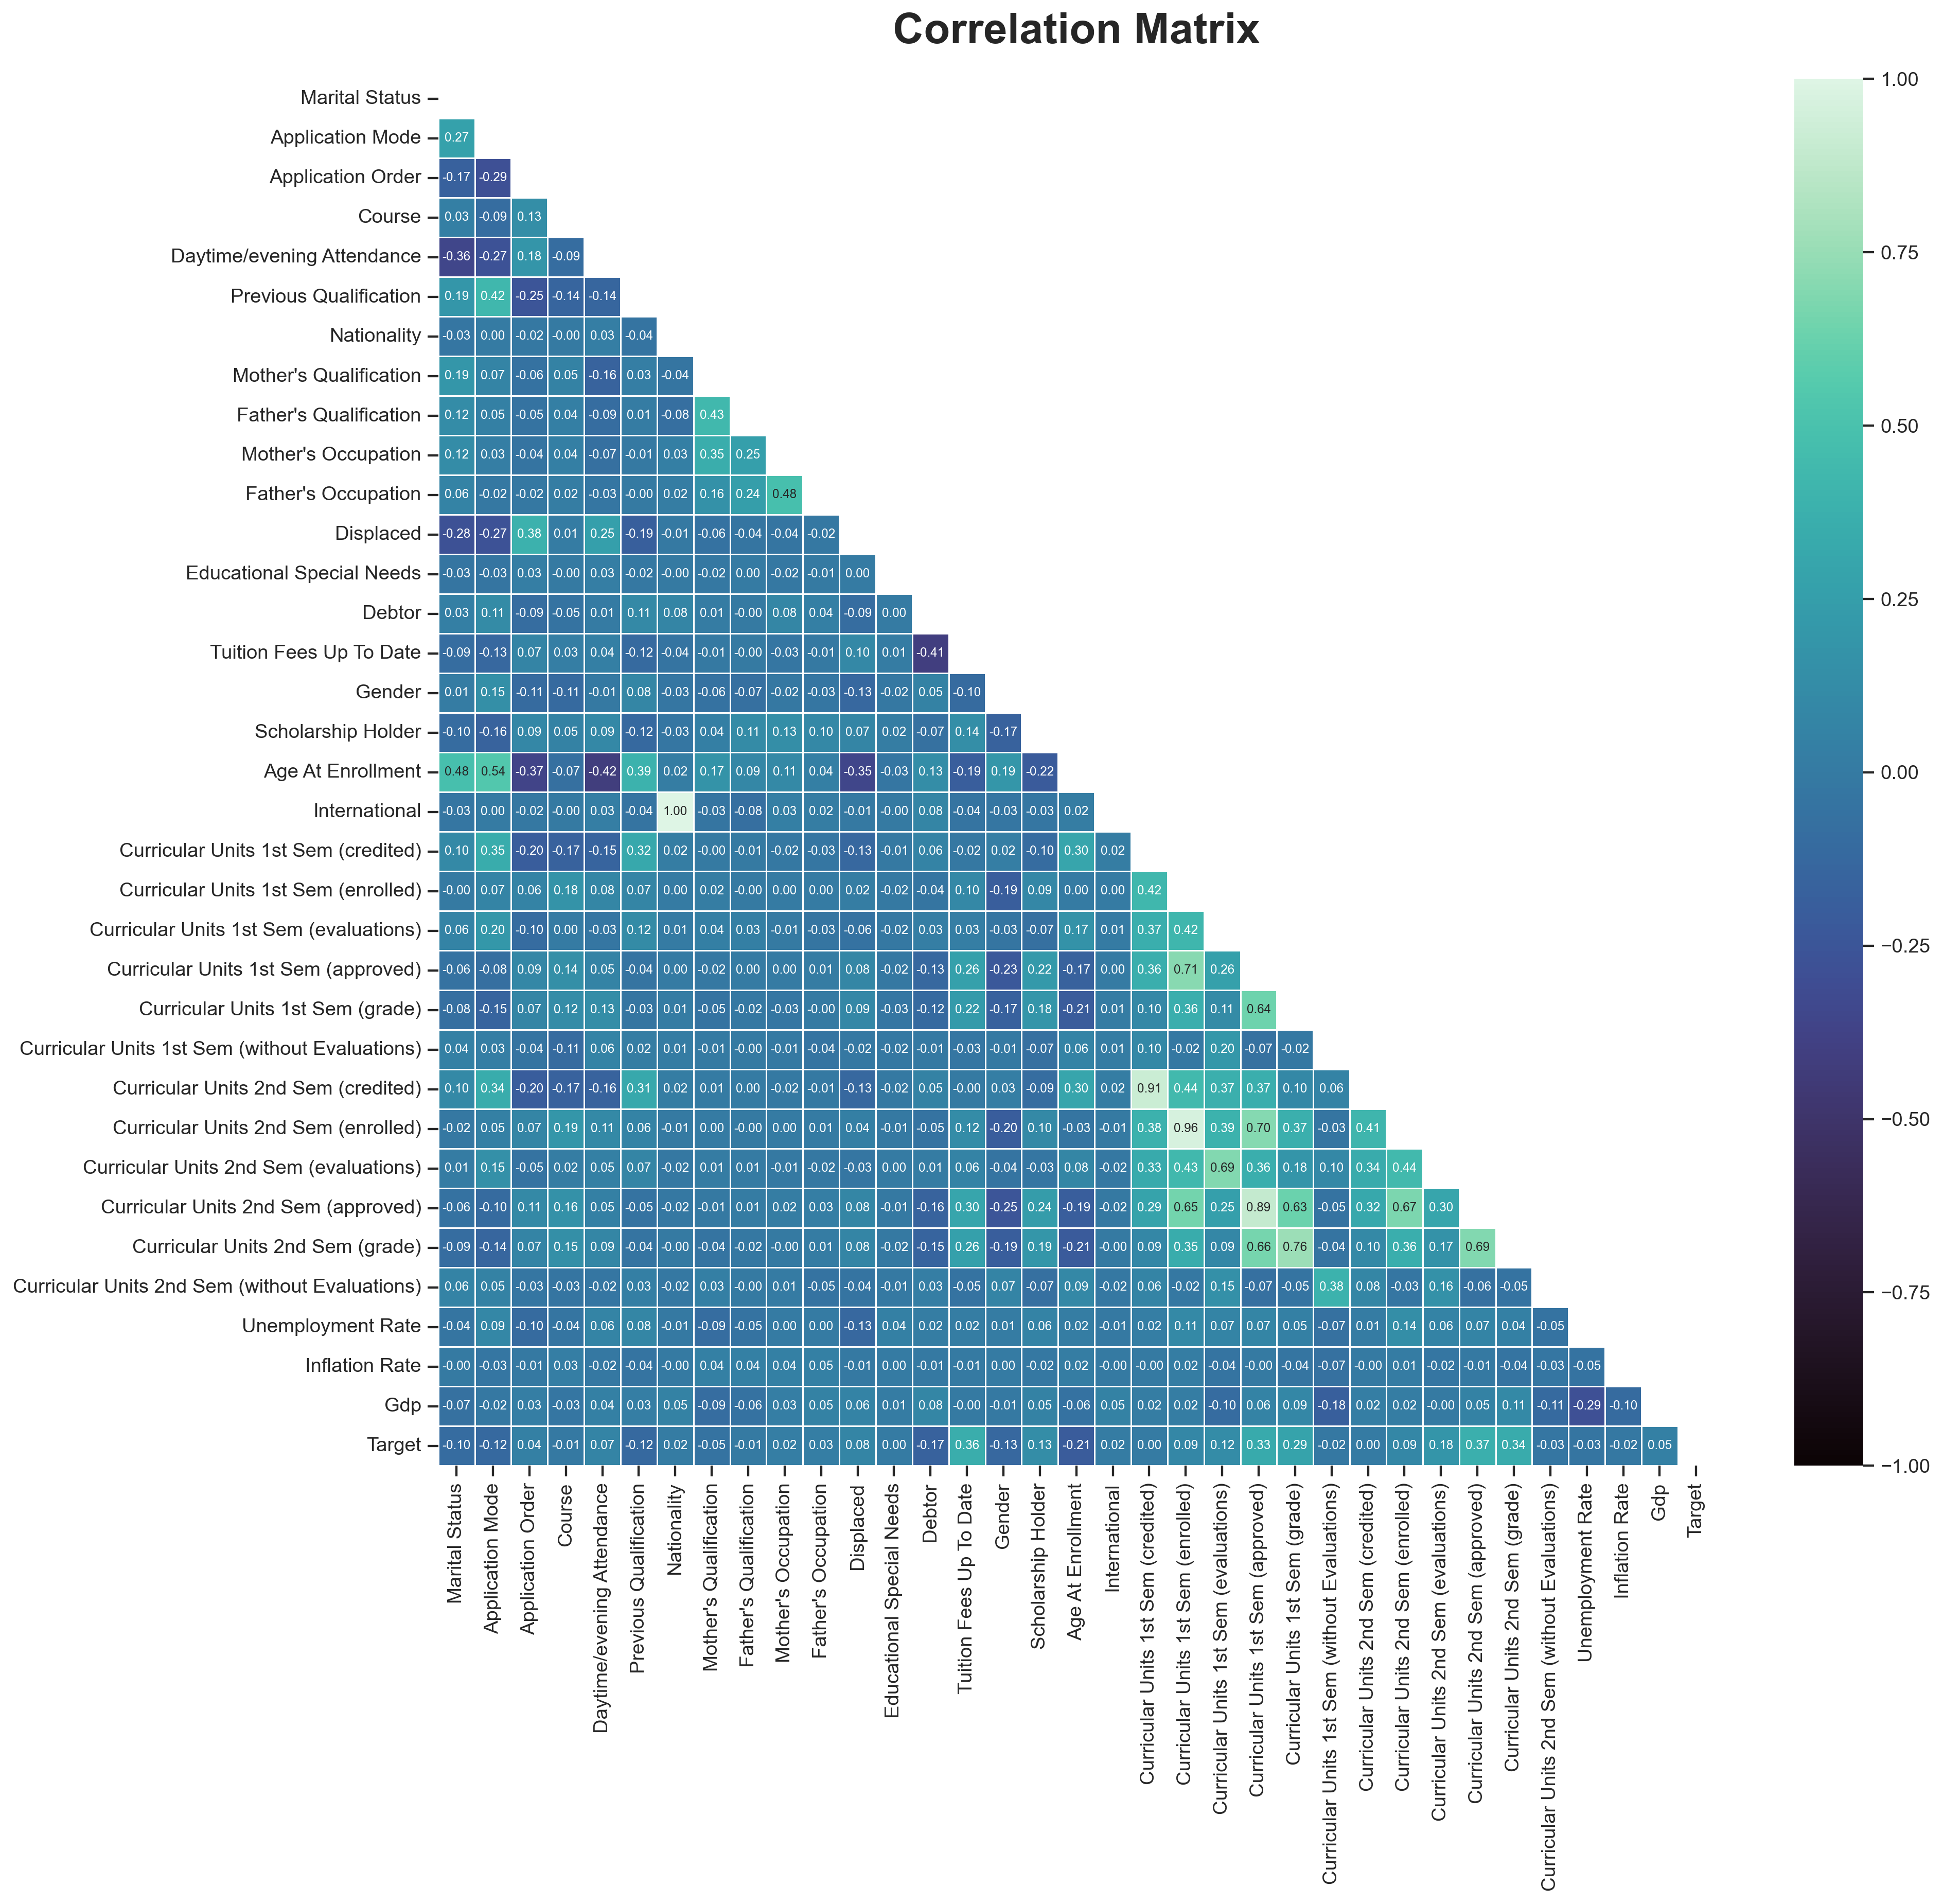

In [377]:
plt.figure(figsize=(16,14), dpi=250)
sns.set(style='ticks', palette='muted')

# Generate correlation matrix using Spearman correlation 
corr = df.corr(method='spearman')

# Generate a mask for upper triangular correlation matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax1 = sns.heatmap((corr), linewidths=0.3, mask= mask, cmap='mako', annot = True, annot_kws = {'size': 7}, fmt='.2f', vmin=-1, vmax=1)

ax1.set_xticklabels(col_names_hm)
ax1.set_yticklabels(col_names_hm)

plt.title('Correlation Matrix', fontsize=24, fontweight='bold', pad=20)

plt.show()

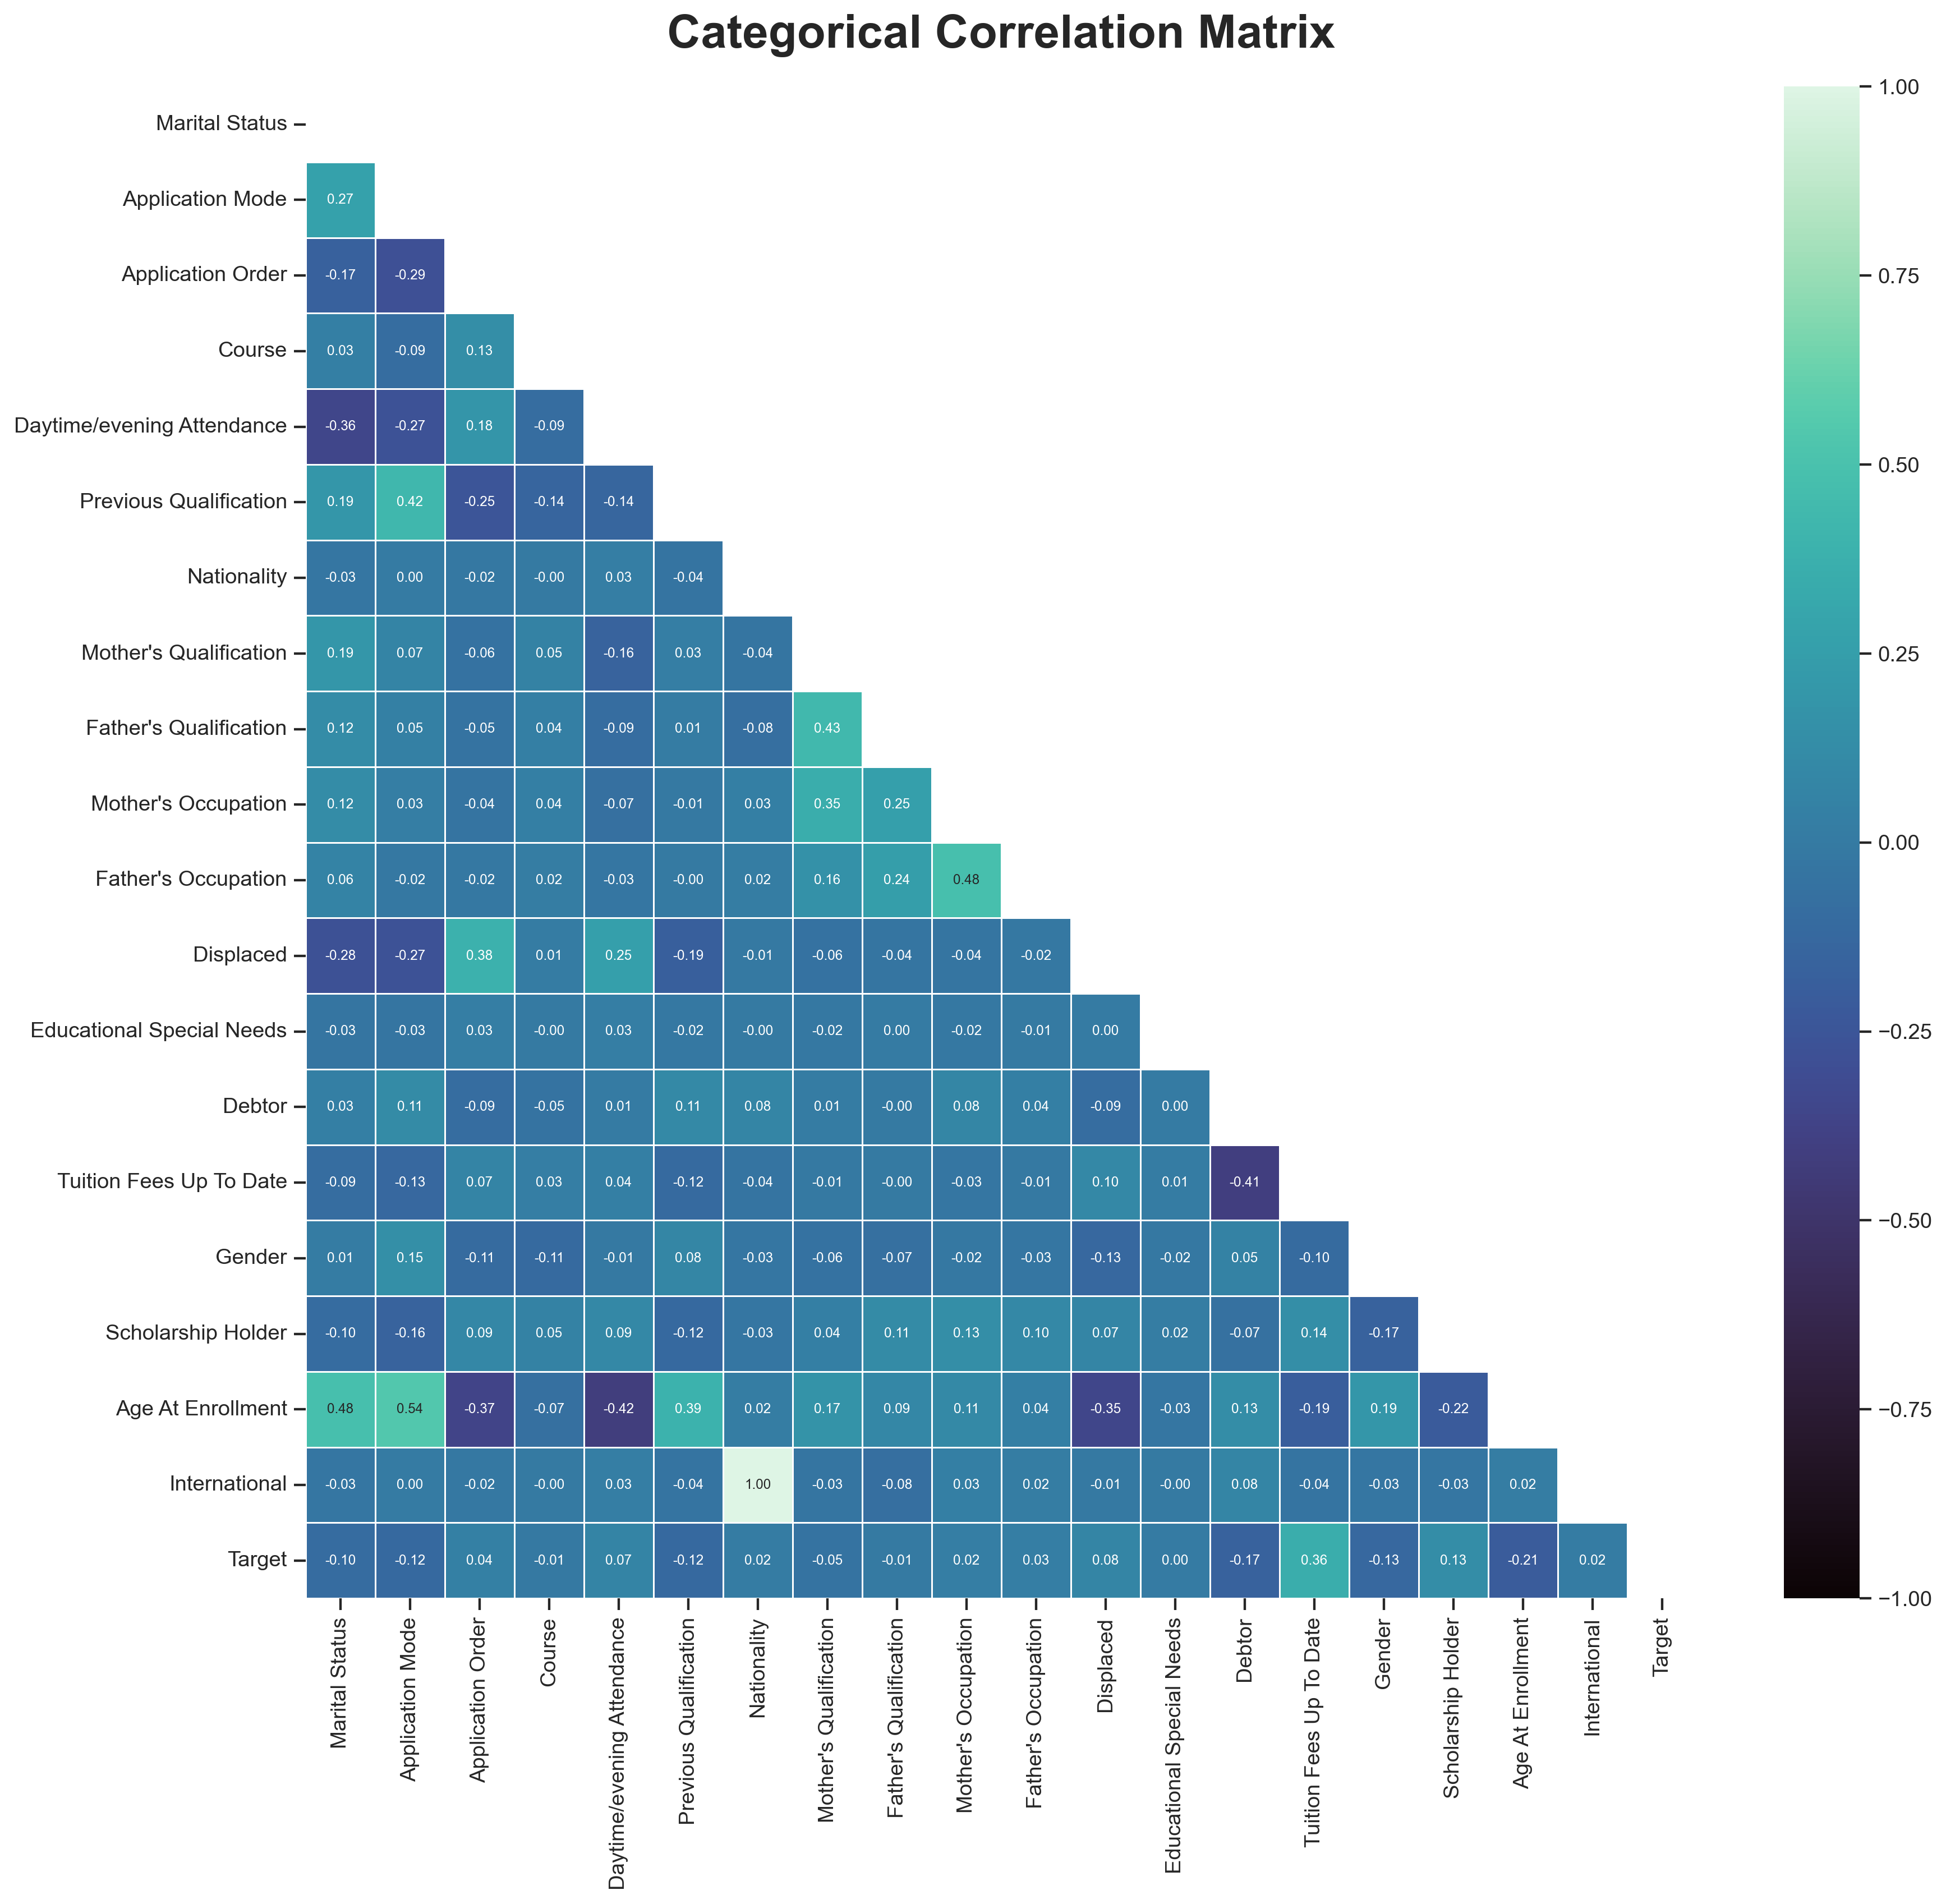

In [378]:
plt.figure(figsize=(16,14), dpi=250)
sns.set(style='ticks', palette='muted')

# Generate correlation matrix using Spearman correlation 
corr_cat = df[cat + ['target']].corr(method='spearman')

# Generate a mask for upper triangular correlation matrix
mask = np.zeros_like(corr_cat)
mask[np.triu_indices_from(mask)] = True

ax1 = sns.heatmap((corr_cat), linewidths=0.3, mask= mask, cmap='mako', annot = True, annot_kws = {'size': 7}, fmt='.2f', vmin=-1, vmax=1)

ax1.set_xticklabels(col_names_cat + ['Target'])
ax1.set_yticklabels(col_names_cat + ['Target'])

plt.title('Categorical Correlation Matrix', fontsize=24, fontweight='bold', pad=20)

plt.show()

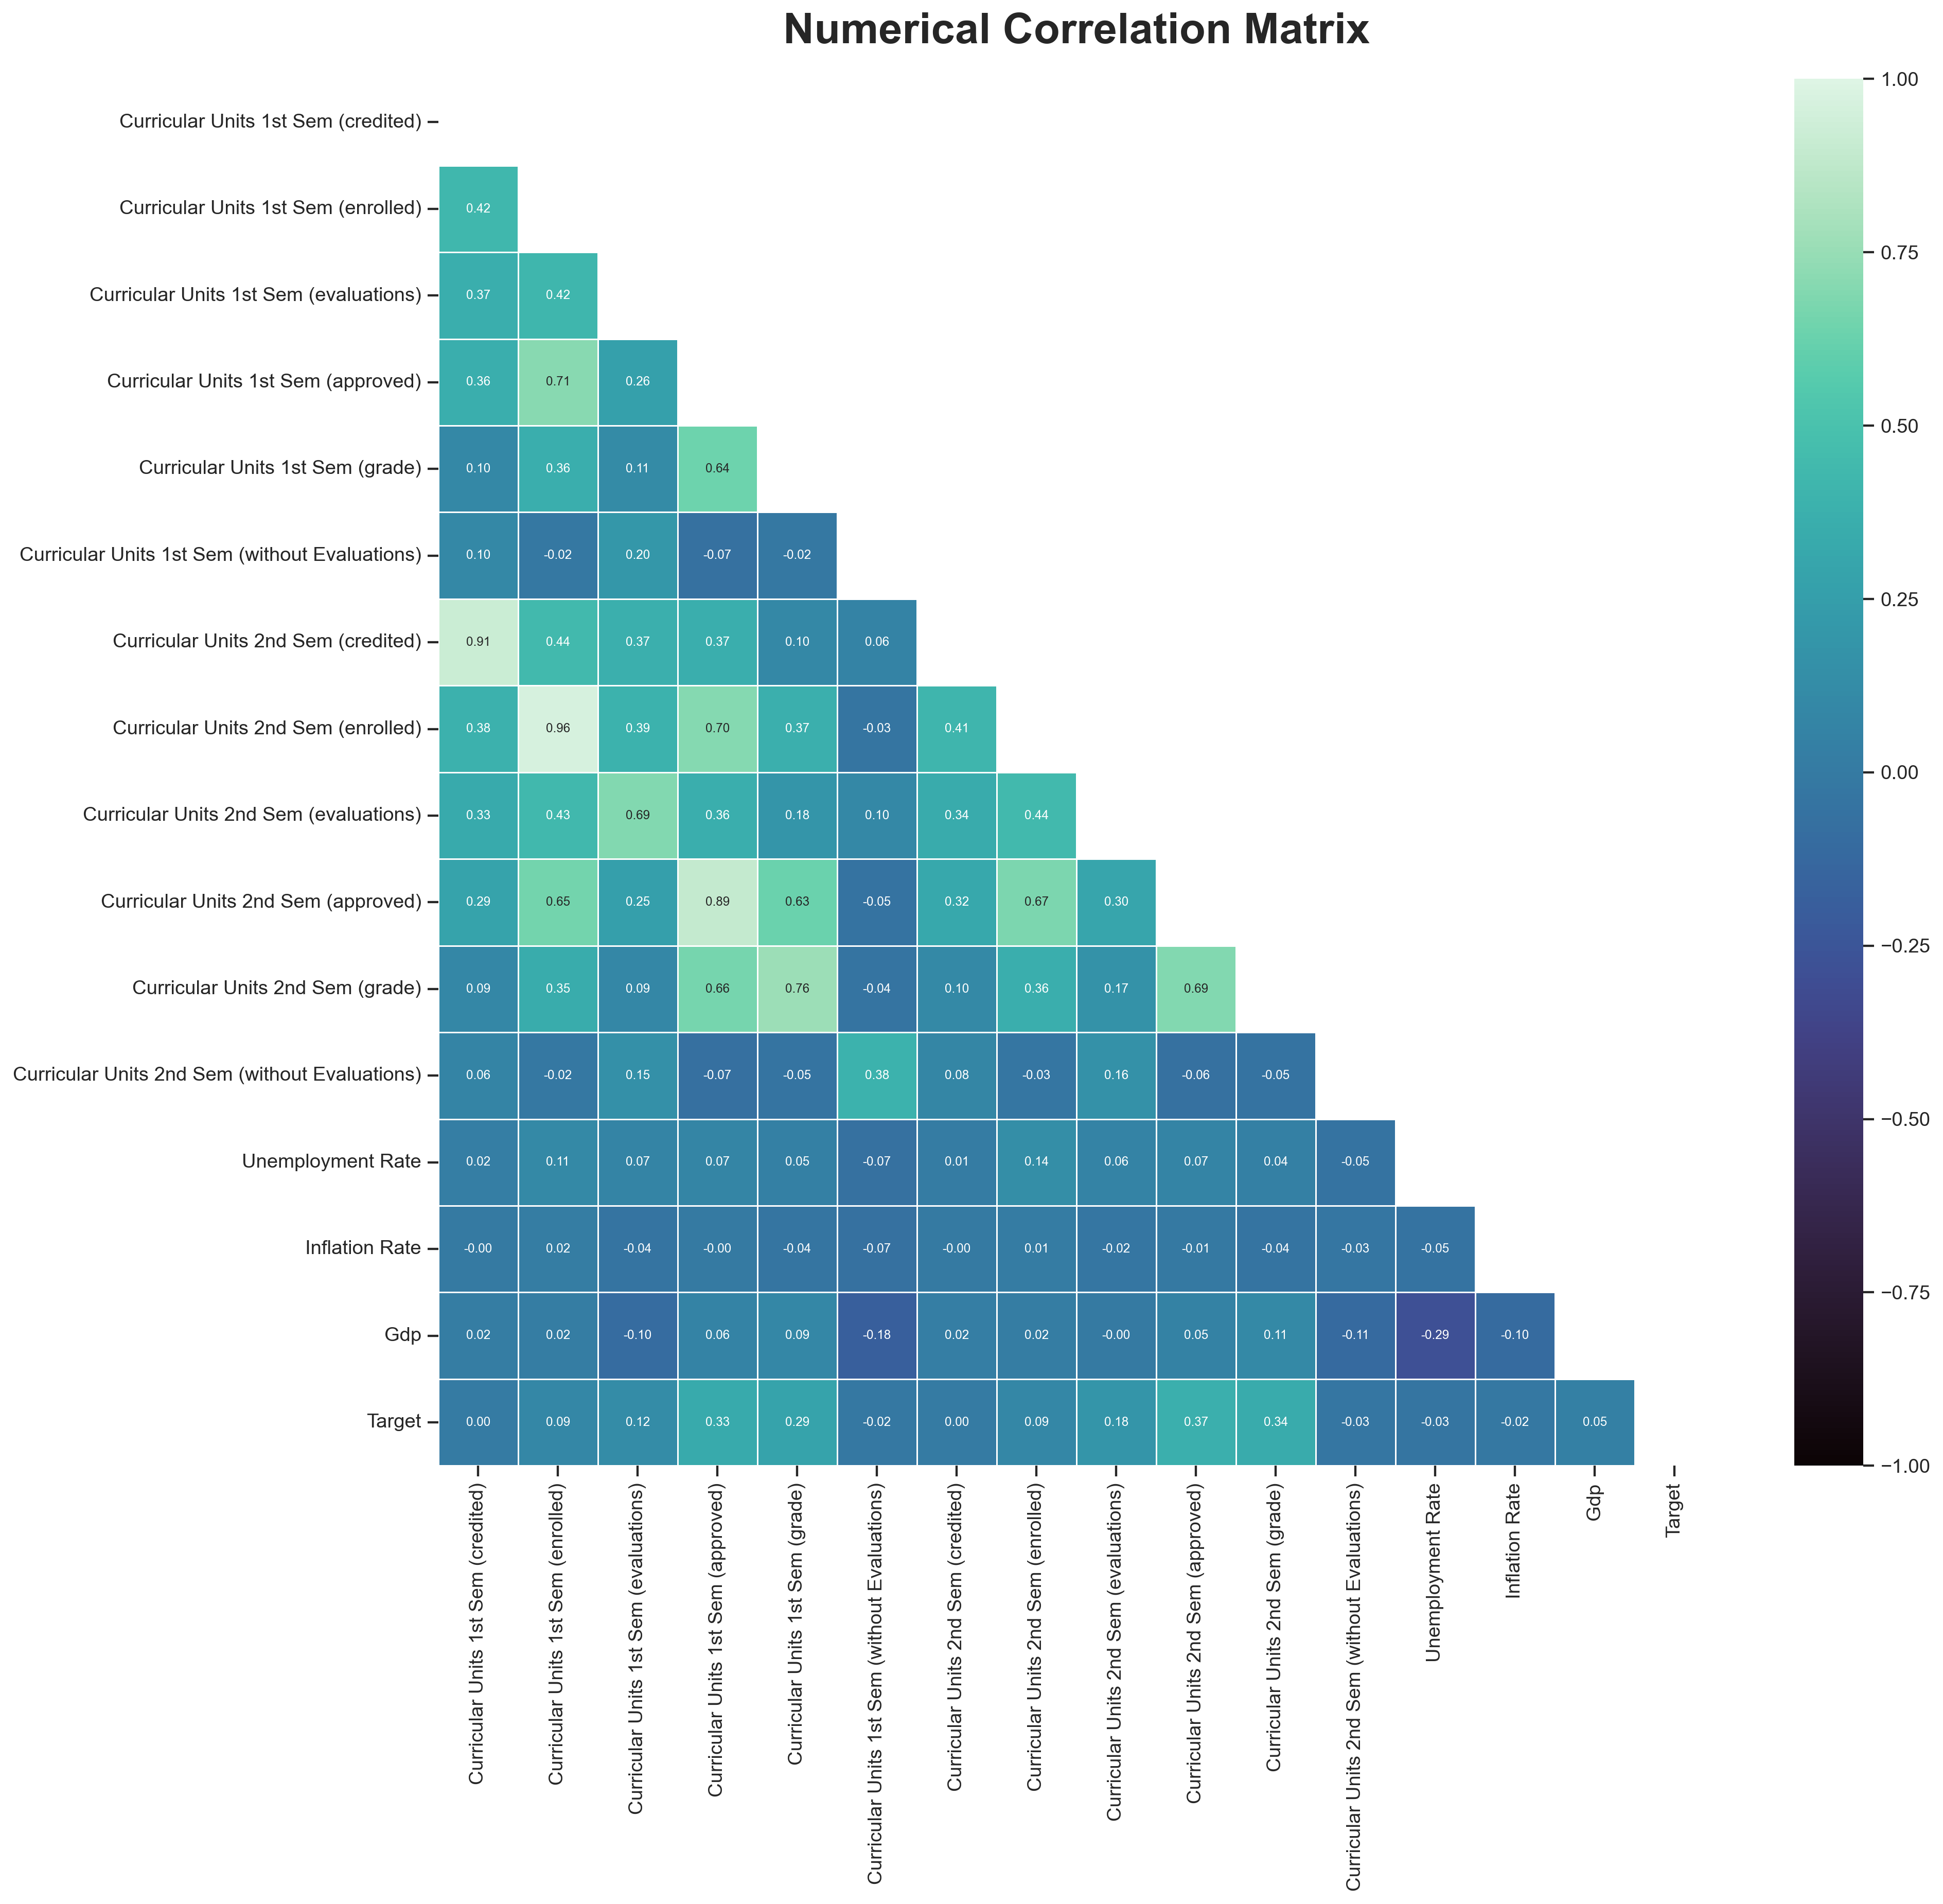

In [379]:
plt.figure(figsize=(16,14), dpi=250)
sns.set(style='ticks', palette='muted')

# Generate correlation matrix using Spearman correlation 
corr_num = df[num + ['target']].corr(method='spearman')

# Generate a mask for upper triangular correlation matrix
mask = np.zeros_like(corr_num)
mask[np.triu_indices_from(mask)] = True

ax1 = sns.heatmap((corr_num), linewidths=0.3, mask= mask, cmap='mako', annot = True, annot_kws = {'size': 7}, fmt='.2f', vmin=-1, vmax=1)

ax1.set_xticklabels(col_names_num + ['Target'])
ax1.set_yticklabels(col_names_num + ['Target'])

plt.title('Numerical Correlation Matrix', fontsize=24, fontweight='bold', pad=20)

plt.show()

In [380]:
target_corr = dict(round(corr['target'],3))

del target_corr['target']

least_corr = [x[0] for x in (sorted(target_corr.items(), key=lambda x: (abs(x[1])), reverse=False)[1:16])]

least_corr, len(least_corr)

(['educational_special_needs',
  'curricular_units_2nd_sem_(credited)',
  "father's_qualification",
  'course',
  'nationality',
  'international',
  'inflation_rate',
  'curricular_units_1st_sem_(without_evaluations)',
  "mother's_occupation",
  'curricular_units_2nd_sem_(without_evaluations)',
  "father's_occupation",
  'unemployment_rate',
  'application_order',
  'gdp',
  "mother's_qualification"],
 15)

The series with the lowest correlation to 'target' are 'educational_special_needs',
 'curricular_units_2nd_sem_(credited)',
 "father's_qualification",
 'course',
 'nationality',
 'international',
 'inflation_rate',
 'curricular_units_1st_sem_(without_evaluations)',
 "mother's_occupation",
 'curricular_units_2nd_sem_(without_evaluations)',
 "father's_occupation",
 'unemployment_rate',
 'application_order' and 'gdp'.

##### Feature Engineering

In [381]:
weakest_features = list(set(least_mis.tolist() + least_corr))

weakest_features, len(weakest_features)

(['inflation_rate',
  'international',
  'gdp',
  'course',
  "father's_qualification",
  'daytime/evening_attendance',
  'unemployment_rate',
  'curricular_units_2nd_sem_(credited)',
  'nationality',
  'curricular_units_2nd_sem_(without_evaluations)',
  "father's_occupation",
  'displaced',
  "mother's_qualification",
  "mother's_occupation",
  'previous_qualification',
  'curricular_units_1st_sem_(credited)',
  'application_order',
  'educational_special_needs',
  'curricular_units_1st_sem_(without_evaluations)',
  'marital_status'],
 20)

Based on the 15 lowest mutual information and correlation scores, we find that 10 of the features score poorly in both cases. We will test our ML models with and without these features and observe whether it makes much of a difference on performance. 

### Validation Framework

60/20/20 train/val/test split

In [394]:
from sklearn.model_selection import train_test_split

train_full, test = train_test_split(df, test_size=0.2, random_state=42)
train, val = train_test_split(train_full, test_size=0.25, random_state=42)

print(df.shape)
print(train_full.shape, test.shape)
print(train.shape, val.shape)

train_full.to_csv('train_full.csv', index=False)
train.to_csv('train.csv', index=False)
val.to_csv('val.csv', index=False)
test.to_csv('test.csv', index=False)

y_train_full = train_full['target']
y_train = train['target']
y_val = val['target']
y_test = test['target']

del train_full['target']
del train['target']
del val['target']
del test['target']

(4424, 35)
(3539, 35) (885, 35)
(2654, 35) (885, 35)


### Data Preprocessing

In [395]:
from sklearn.feature_extraction import DictVectorizer

train_full_dict = train_full.to_dict('records')
train_dict = train.to_dict('records')
val_dict = val.to_dict('records')
test_dict = test.to_dict('records')

dv = DictVectorizer(sparse=False)

X_train_full = dv.fit_transform(train_full_dict)
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

Naive Bayes models such as `MultinomialNB()` don't accept negative values in the feature matrix. We can work around this by scaling the feature matrice's values to $x \in [0, 1]$ using `MinMaxScaler` from sklearn's preprocessing package.

In [396]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

### Model Comparison

##### Importing Models to Compare

In [397]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

##### Importing Metrics to Score Models

In [398]:
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

##### Training + Evaluating Accuracy

In [399]:
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def model_evaluation(model, X_train, y_train):
    clf = model
    clf.fit(X_train, y_train)
    y_val_pred = clf.predict(X_val)
    y_val_cross = cross_val_score(clf, X_val, y_val, cv=20)
    
    return y_val_pred, y_val_cross

##### Importing Function for ROC AUC Score

In [400]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

##### Model Training and Evaluation

In [401]:
models = [LogisticRegression(random_state=42), RandomForestClassifier(random_state=42), DecisionTreeClassifier(random_state=42), KNeighborsClassifier(), 
          SGDClassifier(random_state=42), SVC(random_state=42), LinearSVC(dual=False, random_state=42), MultinomialNB(), BernoulliNB(), GaussianNB()]

model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'K-Nearest Neighbors',
          'SGD', 'SVC', 'Linear SVC',
          'Multinomial NB', 'Bernoulli NB', 'Gaussian NB']

scores = {}
scores_cross = {}
scores_precision = {}
scores_recall = {}
scores_f1 = {}
scores_AUC = {}

avg_type = 'macro'

for i, model in enumerate(models):
    y_val_pred, y_val_cross = model_evaluation(model, X_train, y_train)
    
    scores[model_names[i]] = (y_val_pred == y_val).mean()
    scores_cross[model_names[i]] = y_val_cross.mean()
    scores_precision[model_names[i]] = precision_score(y_val, y_val_pred, average=avg_type)
    scores_recall[model_names[i]] = recall_score(y_val, y_val_pred, average=avg_type)
    scores_f1[model_names[i]] = f1_score(y_val, y_val_pred, average=avg_type)
    scores_AUC[model_names[i]] = roc_auc_score(lb.fit_transform(y_val), lb.transform(y_val_pred))

    print(f'Model: {model_names[i]:<19} - Accuracy: {(y_val_pred == y_val).mean():.2f} - Cross-Validation: {y_val_cross.mean():.2f}'
           f' - Precision: {precision_score(y_val, y_val_pred, average=avg_type):.2f} - Recall: {recall_score(y_val, y_val_pred, average=avg_type):.2f}'
             f' - F1: {f1_score(y_val, y_val_pred, average=avg_type):.2f} - AUC: {roc_auc_score(lb.fit_transform(y_val), lb.transform(y_val_pred)):.2f}')

metrics = ['Accuracy', 'Cross-Val', 'Precision', 'Recall', 'F1', 'AUC']
metric_scores = [scores, scores_cross, scores_precision, scores_recall, scores_f1, scores_AUC]

print('')

for i in range(len(metrics)):
    print(f'Best {metrics[i]:<10}: {str(max(metric_scores[i], key=metric_scores[i].get)):<15}')

Model: Logistic Regression - Accuracy: 0.76 - Cross-Validation: 0.73 - Precision: 0.71 - Recall: 0.65 - F1: 0.66 - AUC: 0.75
Model: Random Forest       - Accuracy: 0.76 - Cross-Validation: 0.75 - Precision: 0.72 - Recall: 0.67 - F1: 0.68 - AUC: 0.77
Model: Decision Tree       - Accuracy: 0.67 - Cross-Validation: 0.66 - Precision: 0.62 - Recall: 0.61 - F1: 0.61 - AUC: 0.72
Model: K-Nearest Neighbors - Accuracy: 0.66 - Cross-Validation: 0.66 - Precision: 0.56 - Recall: 0.55 - F1: 0.54 - AUC: 0.68
Model: SGD                 - Accuracy: 0.74 - Cross-Validation: 0.72 - Precision: 0.71 - Recall: 0.62 - F1: 0.60 - AUC: 0.73
Model: SVC                 - Accuracy: 0.75 - Cross-Validation: 0.72 - Precision: 0.70 - Recall: 0.64 - F1: 0.65 - AUC: 0.75
Model: Linear SVC          - Accuracy: 0.75 - Cross-Validation: 0.75 - Precision: 0.71 - Recall: 0.64 - F1: 0.63 - AUC: 0.74
Model: Multinomial NB      - Accuracy: 0.66 - Cross-Validation: 0.66 - Precision: 0.46 - Recall: 0.52 - F1: 0.48 - AUC: 0.66


##### Without 'Weakest' Features

In [402]:
df2 = df.drop(weakest_features, axis=1).copy()

train_full, test = train_test_split(df2, test_size=0.2, random_state=42)
train, val = train_test_split(train_full, test_size=0.25, random_state=42)

train_full.to_csv('train_full.csv', index=False)
train.to_csv('train.csv', index=False)
val.to_csv('val.csv', index=False)
test.to_csv('test.csv', index=False)

y_train_full = train_full['target']
y_train = train['target']
y_val = val['target']
y_test = test['target']

del train_full['target']
del train['target']
del val['target']
del test['target']

train_full_dict = train_full.to_dict('records')
train_dict = train.to_dict('records')
val_dict = val.to_dict('records')
test_dict = test.to_dict('records')

X_train_full = dv.fit_transform(train_full_dict)
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

w_scores = {}
w_scores_cross = {}
w_scores_precision = {}
w_scores_recall = {}
w_scores_f1 = {}
w_scores_AUC = {}

avg_type = 'macro'

for i, model in enumerate(models):
    y_val_pred, y_val_cross = model_evaluation(model, X_train, y_train)
    
    w_scores[model_names[i]] = (y_val_pred == y_val).mean()
    w_scores_cross[model_names[i]] = y_val_cross.mean()
    w_scores_precision[model_names[i]] = precision_score(y_val, y_val_pred, average=avg_type)
    w_scores_recall[model_names[i]] = recall_score(y_val, y_val_pred, average=avg_type)
    w_scores_f1[model_names[i]] = f1_score(y_val, y_val_pred, average=avg_type)
    w_scores_AUC[model_names[i]] = roc_auc_score(lb.fit_transform(y_val), lb.transform(y_val_pred))

    print(f'Model: {model_names[i]:<19} - Accuracy: {(y_val_pred == y_val).mean():.2f} - Cross-Validation: {y_val_cross.mean():.2f}'
           f' - Precision: {precision_score(y_val, y_val_pred, average=avg_type):.2f} - Recall: {recall_score(y_val, y_val_pred, average=avg_type):.2f}'
             f' - F1: {f1_score(y_val, y_val_pred, average=avg_type):.2f} - AUC: {roc_auc_score(lb.fit_transform(y_val), lb.transform(y_val_pred)):.2f}')

metrics = ['Accuracy', 'Cross-Val', 'Precision', 'Recall', 'F1', 'AUC']
w_metric_scores = [w_scores, w_scores_cross, w_scores_precision, w_scores_recall, w_scores_f1, w_scores_AUC]

print('')

for i in range(len(metrics)):
    print(f'Best {metrics[i]:<10}: {str(max(w_metric_scores[i], key=w_metric_scores[i].get)):<15}')

Model: Logistic Regression - Accuracy: 0.76 - Cross-Validation: 0.74 - Precision: 0.71 - Recall: 0.65 - F1: 0.66 - AUC: 0.75
Model: Random Forest       - Accuracy: 0.74 - Cross-Validation: 0.74 - Precision: 0.68 - Recall: 0.64 - F1: 0.65 - AUC: 0.75
Model: Decision Tree       - Accuracy: 0.67 - Cross-Validation: 0.66 - Precision: 0.61 - Recall: 0.61 - F1: 0.61 - AUC: 0.72
Model: K-Nearest Neighbors - Accuracy: 0.72 - Cross-Validation: 0.72 - Precision: 0.63 - Recall: 0.61 - F1: 0.61 - AUC: 0.73
Model: SGD                 - Accuracy: 0.75 - Cross-Validation: 0.72 - Precision: 0.70 - Recall: 0.62 - F1: 0.61 - AUC: 0.73
Model: SVC                 - Accuracy: 0.76 - Cross-Validation: 0.74 - Precision: 0.74 - Recall: 0.67 - F1: 0.69 - AUC: 0.77
Model: Linear SVC          - Accuracy: 0.75 - Cross-Validation: 0.74 - Precision: 0.69 - Recall: 0.63 - F1: 0.63 - AUC: 0.74
Model: Multinomial NB      - Accuracy: 0.65 - Cross-Validation: 0.64 - Precision: 0.45 - Recall: 0.51 - F1: 0.47 - AUC: 0.64


##### Comparing Evaluations

In [403]:
np.array(list(scores.values())) - np.array(list(w_scores.values()))

M = []

for i in range(len(metric_scores)):
    M.append(np.array(list(metric_scores[i].values())) - np.array(list(w_metric_scores[i].values())))

Text(0.5, 1.0, 'Difference in Model Scores')

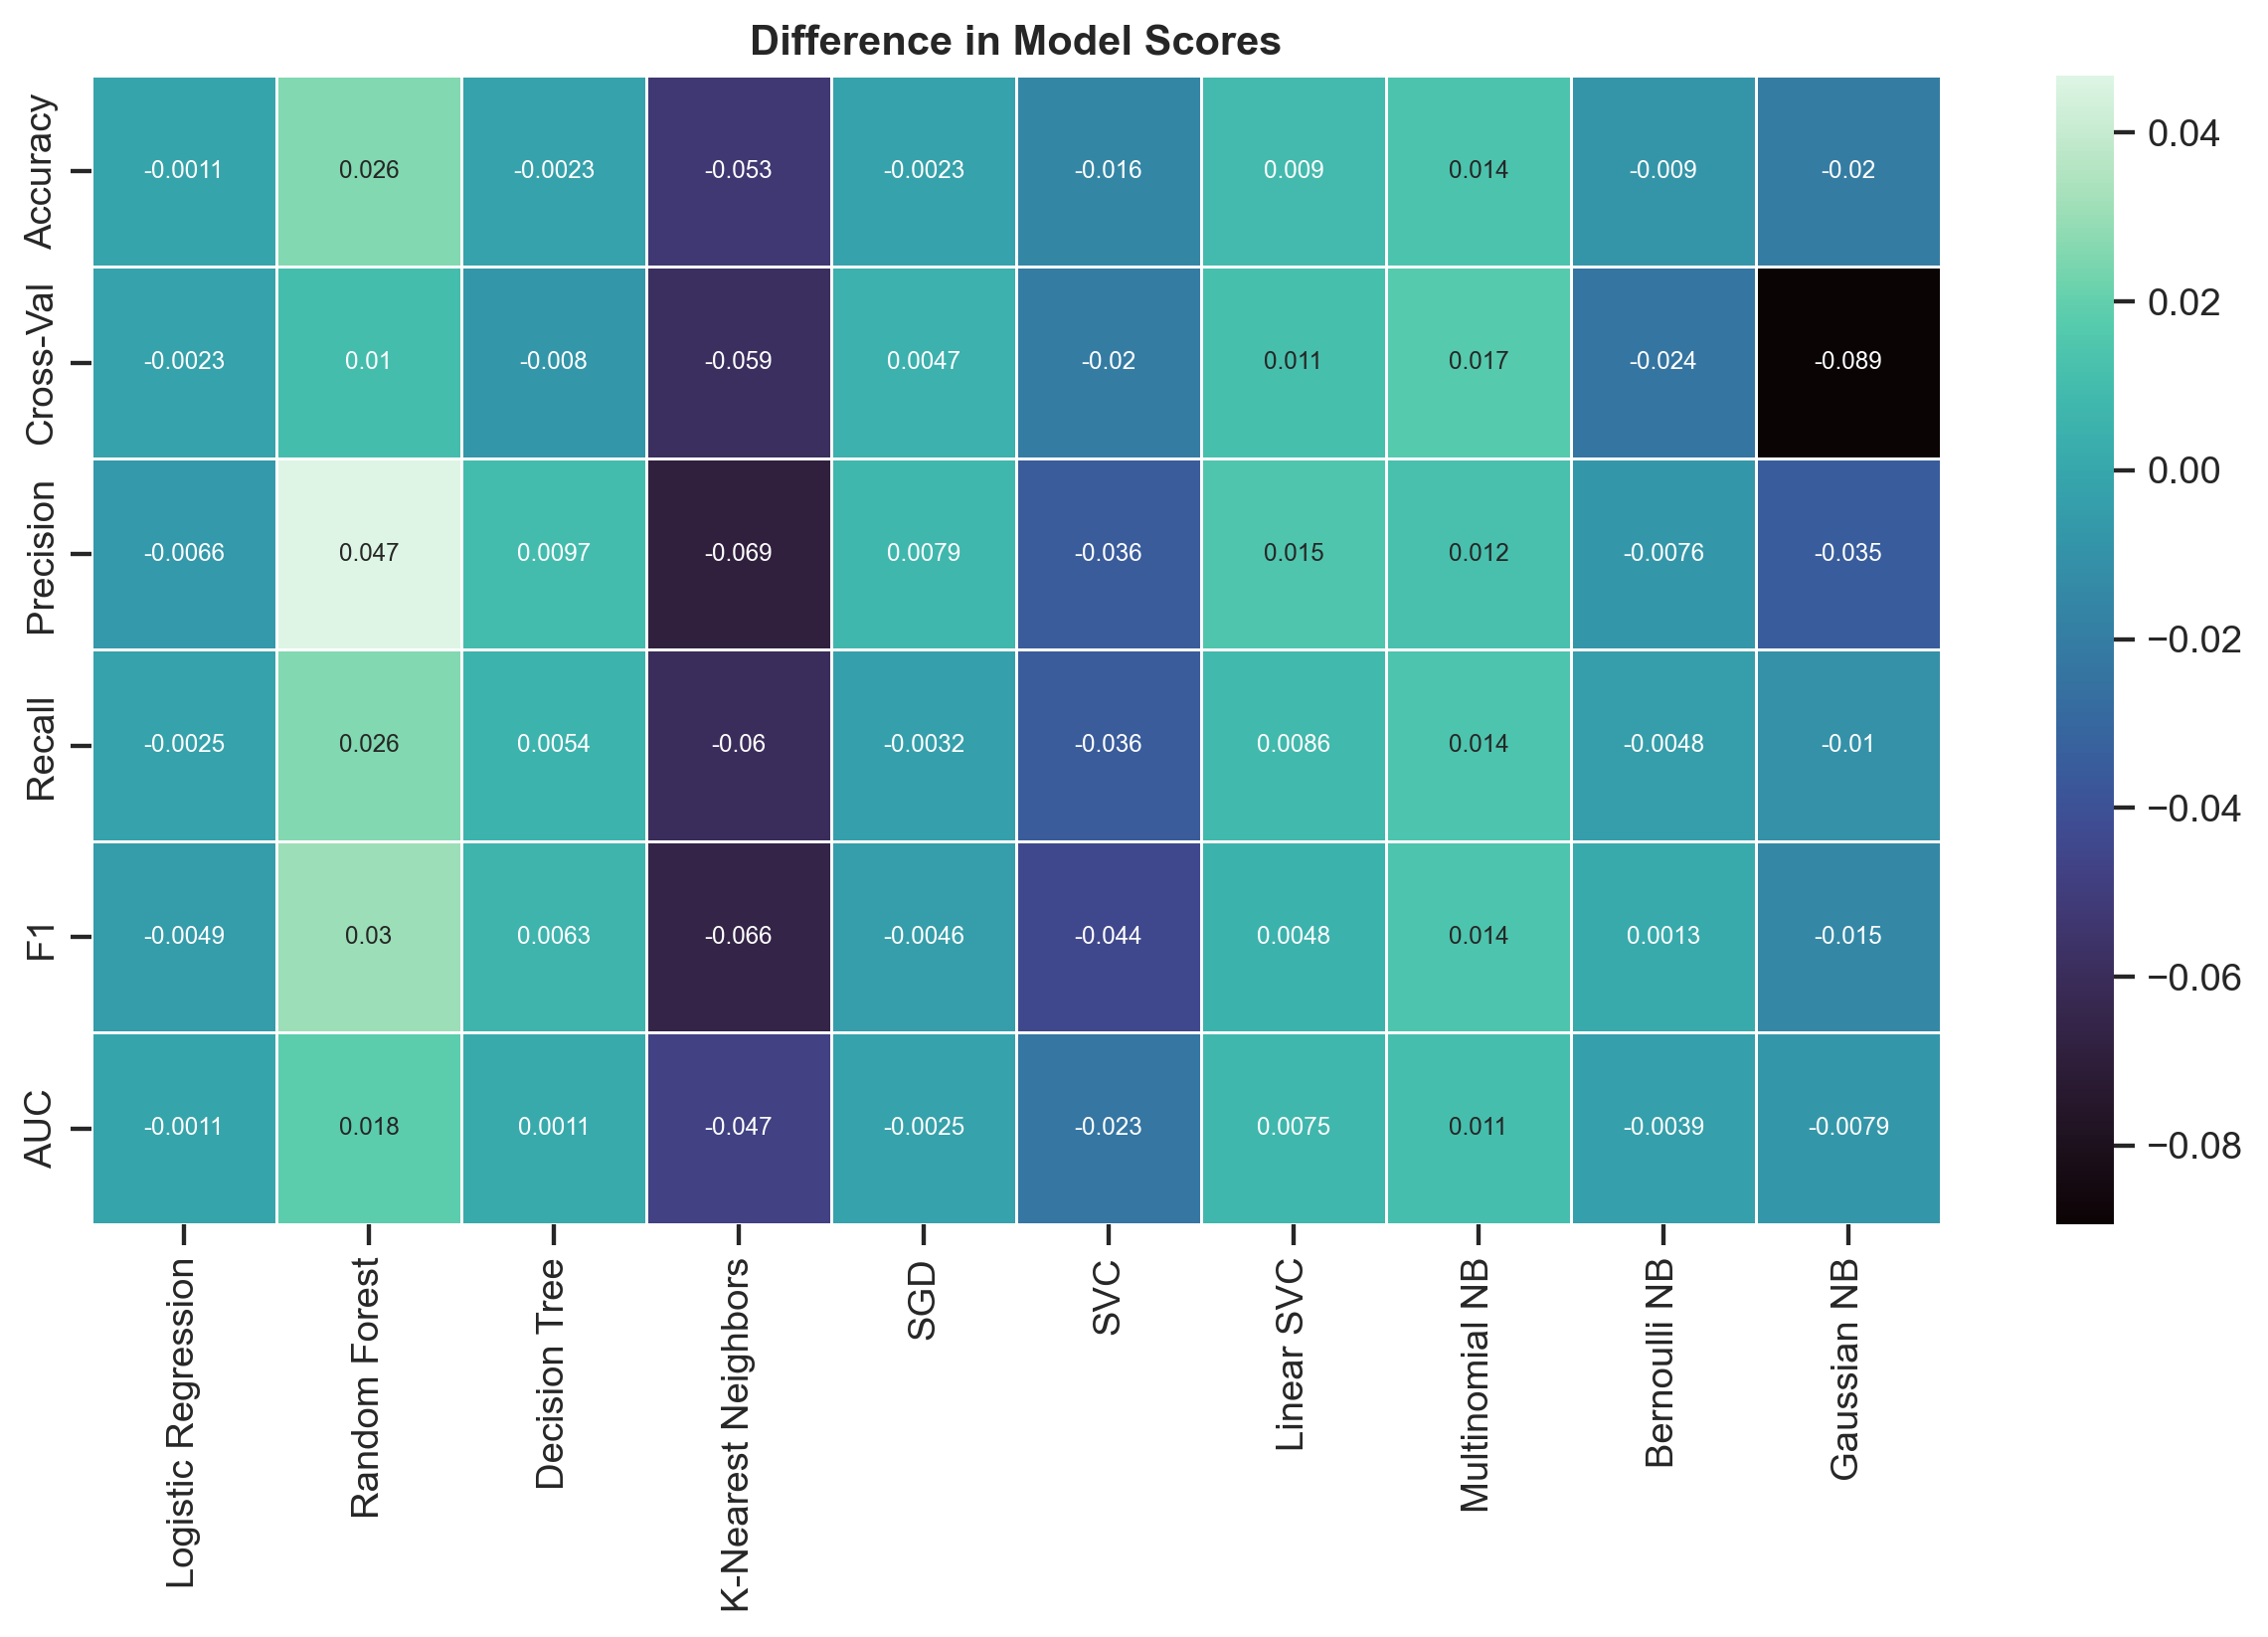

In [404]:
plt.figure(figsize=(12, 6), dpi=250)

ax1 = sns.heatmap(M, linewidths=0.3, cmap='mako', annot = True, annot_kws = {'size': 7})

ax1.set_xticklabels(model_names, rotation=90)
ax1.set_yticklabels(metrics)

plt.title('Difference in Model Scores', fontsize=12, fontweight='bold')

Based on the heatmap above, we can see that removing the 20 'weakest' features of our dataset has very little effect on model outcomes. The models to primarily benefit from the reduced features are K-Nearest Neighbors, SVC, Bernoulli NB and Gaussian NB; the other models were moreso negatively affected by the remove of features.

Using the full-featured dataset, the Random Forest was the best scoring model in terms of all categories (according to my run with `random_state = 42` for reproducibility). SVD out-performs Random Forest in the case of reduced features, but still doesn't beat its performance in the full-feature set.

Because of this, we will use Random Forest as our model of choice.

### Model Selection

As mentioned above, we will use Random Forest to train our final model. Before continuing, let us attempt to improve Random Forest's performance by tweaking its hyper parameters.

In [405]:
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)

clf = SVC()
clf.fit(X_train_full, y_train_full)

y_test_pred = clf.predict(X_test)

avg_type = 'macro'

print(f'Accuracy: {(y_test_pred == y_test).mean():.3f} - Cross-Validation: {cross_val_score(clf, X_test, y_test, cv=20).mean():.3f}'
      f' - Precision: {precision_score(y_test, y_test_pred, average=avg_type):.3f} - Recall: {recall_score(y_test, y_test_pred, average=avg_type):.2f}'
        f' - F1: {f1_score(y_test, y_test_pred, average=avg_type):.3f}')

Accuracy: 0.737 - Cross-Validation: 0.724 - Precision: 0.683 - Recall: 0.65 - F1: 0.655


### Model Fine-Tuning

### Conclusion